<a href="https://colab.research.google.com/github/PareesaK/Credit-Card-Transactions-Fraud-Detection-Project/blob/main/fraud%20Rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data & Libraries


Data source: https://www.kaggle.com/datasets/kartik2112/fraud-detection
Took a sample of 50,000 from the "test" dataset, using:
df_sample, df_sample_95 = train_test_split(df, test_size=0.95, stratify=df['is_fraud'], random_state=42). Our dataset is the 5% sample.

In [1]:
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import data
df = pd.read_csv("/content/drive/MyDrive/Grad/fraud.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,417308,2020-12-01 05:38:34,348789608637806,fraud_Berge LLC,gas_transport,50.42,Megan,Murphy,F,53696 Laura Radial,...,40.4542,-98.6538,331,Telecommunications researcher,1950-08-19,dc152cdac86b839b6f535b96b249bdd5,1385876314,40.000200,-99.040108,0
1,22343,2020-06-29 02:05:06,2291163933867244,"fraud_Bins, Balistreri and Beatty",shopping_pos,39.47,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,254f731157566c1129d88b1fec57ea9d,1372471506,33.547040,-80.975514,0
2,540530,2020-12-28 15:48:07,372509258176510,"fraud_Bradtke, Torp and Bahringer",personal_care,8.16,Kristen,Hanson,F,26544 Andrea Glen,...,42.9147,-83.4845,6951,Learning disability nurse,1985-06-18,cdef45931b53a75bf09e3ea265df817c,1388245687,43.651491,-84.040712,0
3,492286,2020-12-17 23:47:28,571365235126,"fraud_Prosacco, Kreiger and Kovacek",home,25.48,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,...,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,15b1835cfe2cef056258d83a71e1d6f3,1387324048,44.947844,-85.289697,0
4,17203,2020-06-27 11:52:35,4225990116481262579,"fraud_Bernier, Volkman and Hoeger",misc_net,5.71,Brian,Simpson,M,2711 Duran Pines,...,20.0827,-155.4880,4878,Physiotherapist,1966-12-03,10b26afaa3610fe336b15e95522b3390,1372333955,19.658131,-156.015553,0


# Basic Data Information

In [4]:
#get shape
df.shape

(27785, 23)

In [5]:
#are there duplicates?
df.duplicated().sum()

0

In [6]:
#get datatypes
df.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [7]:
# is there class imbalance?
df['is_fraud'].value_counts()

,count
is_fraud,
0,27678
1,107


<Axes: xlabel='is_fraud', ylabel='count'>

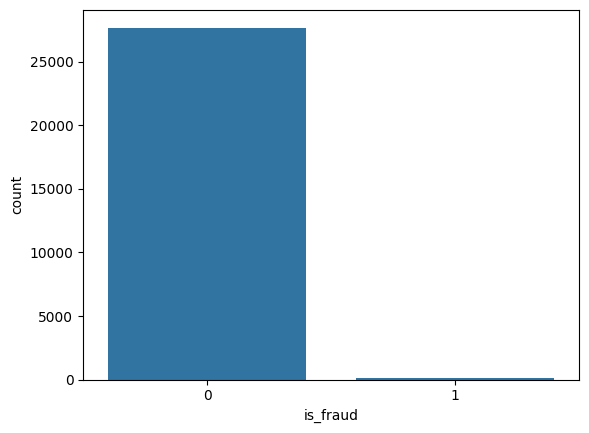

In [8]:
sns.countplot(x='is_fraud', data=df)

In [9]:
#percentage of binary class
print("percentage of each class", df['is_fraud'].value_counts()/len(df)*100)

percentage of each class is_fraud
0    99.6149
1     0.3851
Name: count, dtype: float64


# Data Quality Report

## Continuous Features

In [10]:
# identify continuous features
conf = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
conf

['Unnamed: 0',
 'cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [11]:
#identify any columns to filter out from the "continuous features"
conf_exclude = ['Unnamed: 0', 'cc_num'] #excluding unamned as that is just the row #, and excluding credit card # as that is an ID
filter_conf = [x for x in conf if x not in conf_exclude]
filter_conf

['amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [12]:
#get summary stats on continuous
df[filter_conf].describe()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,27785.000000,27785.000000,27785.000000,27785.000000,2.778500e+04,2.778500e+04,27785.000000,27785.000000,27785.000000
mean,68.284956,48733.838222,38.531673,-90.174147,8.690627e+04,1.380672e+09,38.534279,-90.170911,0.003851
std,136.198360,26895.975102,5.034317,13.643334,2.906983e+05,5.194009e+06,5.069409,13.658477,0.061938
min,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.669812,0.000000
25%,9.520000,26041.000000,34.668900,-96.786900,7.430000e+02,1.376062e+09,34.776107,-96.855602,0.000000
50%,47.230000,48174.000000,39.371600,-87.458100,2.456000e+03,1.380692e+09,39.402238,-87.399780,0.000000
75%,82.900000,72011.000000,41.894800,-80.158000,2.032800e+04,1.385863e+09,41.955067,-80.181585,0.000000
max,8517.380000,99783.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.671540,-66.985234,1.000000


In [13]:
pd.options.display.float_format = '{:.3f}'.format #ensures that the formatting will be more readable.

data_quality_conf = pd.DataFrame({
    'Feature': filter_conf,
    'Count': df[filter_conf].count().values,
    'Missing Values': df[filter_conf].isnull().sum().values,
    'Cardinality': df[filter_conf].nunique().values,
    'Min': df[filter_conf].min().values,
    '1st Quartile': df[filter_conf].quantile(0.25).values,
    'Mean': df[filter_conf].mean().values,
    'Median': df[filter_conf].median().values,
    '3rd Quartile': df[filter_conf].quantile(0.75).values,
    'Max': df[filter_conf].max().values,
    'Standard Deviation': df[filter_conf].std().values,
})
data_quality_conf

,Feature,Count,Missing Values,Cardinality,Min,1st Quartile,Mean,Median,3rd Quartile,Max,Standard Deviation
0,amt,27785,0,12365,1.000,9.520,68.285,47.230,82.900,8517.380,136.198
1,zip,27785,0,900,1257.000,26041.000,48733.838,48174.000,72011.000,99783.000,26895.975
2,lat,27785,0,898,20.027,34.669,38.532,39.372,41.895,65.690,5.034
3,long,27785,0,899,-165.672,-96.787,-90.174,-87.458,-80.158,-67.950,13.643
4,city_pop,27785,0,825,23.000,743.000,86906.268,2456.000,20328.000,2906700.000,290698.323
5,unix_time,27785,0,27758,1371816893.000,1376061884.000,1380671597.499,1380691607.000,1385862997.000,1388534055.000,5194009.361
6,merch_lat,27785,0,27767,19.027,34.776,38.534,39.402,41.955,66.672,5.069
7,merch_long,27785,0,27774,-166.670,-96.856,-90.171,-87.400,-80.182,-66.985,13.658
8,is_fraud,27785,0,2,0.000,0.000,0.004,0.000,0.000,1.000,0.062


## Categorical Features

In [14]:
#identify any categorical features
catf = df.select_dtypes(include=['object']).columns.tolist()
catf

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num']

In [15]:
#identify any columns to filter out from the "categorical features"
catf_exclude = ['trans_num'] #excluding transaction number as that is an ID
filter_catf = [x for x in catf if x not in catf_exclude]
filter_catf

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob']

In [16]:
#create lists to store modes & frequencies
modes = []
mode_freqs = []
second_modes = []
second_mode_freqs = []
mode_percentages = []
second_mode_percentages = []

In [17]:

# Calculate mode and frequency for each categorical feature
for feature in filter_catf:
    count = df[feature].count()
    mode = df[feature].mode().iloc[0]
    mode_freq = df[feature].value_counts().iloc[0]
    modes.append(mode)
    mode_freqs.append(mode_freq)
    mode_percentages.append((mode_freq / count) * 100 if count > 0 else 0)

    # Calculate second mode and its frequency
    if len(df[feature].value_counts()) > 1:
        second_mode = df[feature].value_counts().index[1]
        second_mode_freq = df[feature].value_counts().iloc[1]
    else:
        second_mode = None
        second_mode_freq = 0

    second_modes.append(second_mode)
    second_mode_freqs.append(second_mode_freq)
    second_mode_percentages.append((second_mode_freq / count) * 100 if count > 0 else 0)


In [18]:
#build quality report table
data_quality_catf = pd.DataFrame({
    'Feature': filter_catf,
    'Count': df[filter_catf].count().values,
    'Missing Values': df[filter_catf].isnull().sum().values,
    'Cardinality': df[filter_catf].nunique().values,
    'Mode':modes,
    'Mode Frequency':mode_freqs,
    'Mode %': mode_percentages,
    '2nd Mode':second_modes,
    '2nd Mode Frequency': second_mode_freqs,
    '2nd Mode %': second_mode_percentages,
})
data_quality_catf

,Feature,Count,Missing Values,Cardinality,Mode,Mode Frequency,Mode %,2nd Mode,2nd Mode Frequency,2nd Mode %
0,trans_date_trans_time,27785,0,27758,2020-06-21 19:09:47,2,0.007,2020-10-05 19:37:49,2,0.007
1,merchant,27785,0,693,fraud_Dickinson Ltd,84,0.302,fraud_Dickinson Ltd,84,0.302
2,category,27785,0,14,gas_transport,2820,10.149,grocery_pos,2601,9.361
3,first,27785,0,339,Christopher,573,2.062,Robert,460,1.656
4,last,27785,0,465,Smith,638,2.296,Williams,481,1.731
5,gender,27785,0,2,F,15252,54.893,M,12533,45.107
6,street,27785,0,911,6983 Carrillo Isle,86,0.310,908 Brooks Brook,84,0.302
7,city,27785,0,839,Birmingham,140,0.504,Meridian,112,0.403
8,state,27785,0,50,TX,2006,7.220,NY,1851,6.662
9,job,27785,0,476,Film/video editor,206,0.741,"Surveyor, land/geomatics",203,0.731


# Univariate Analysis

In [19]:
filter_catf2 = ['merchant','category', 'gender', 'job']

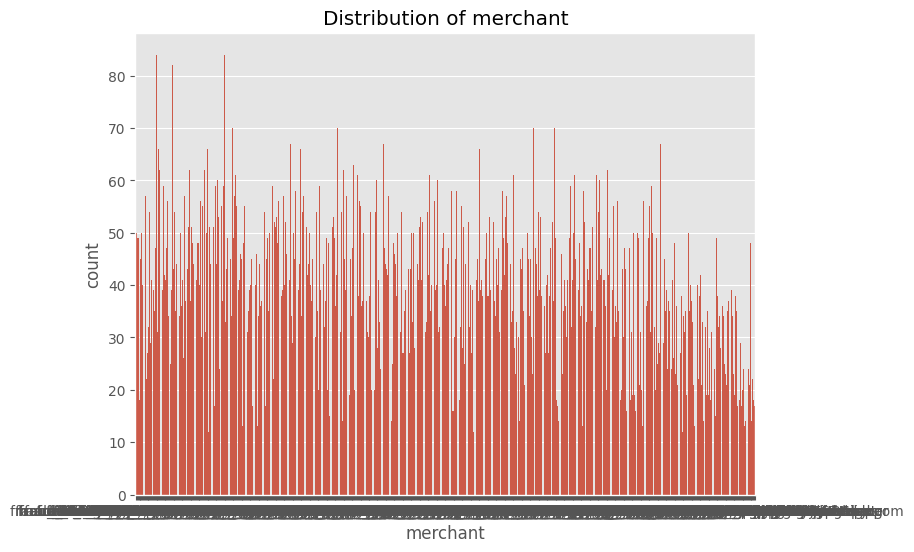

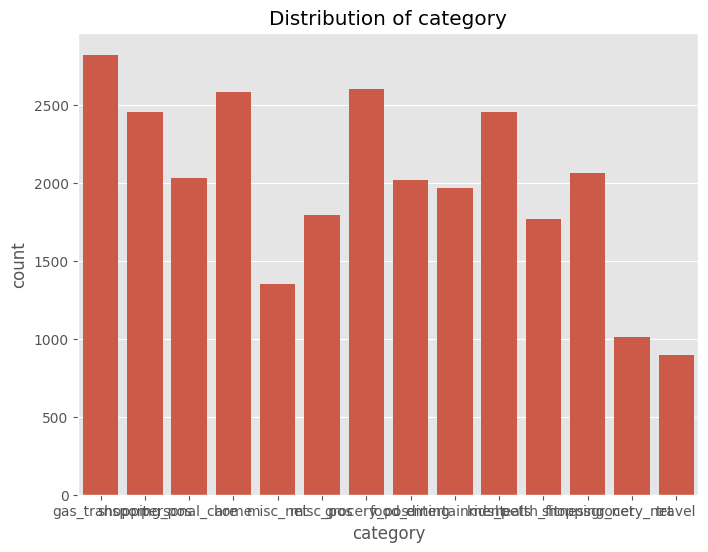

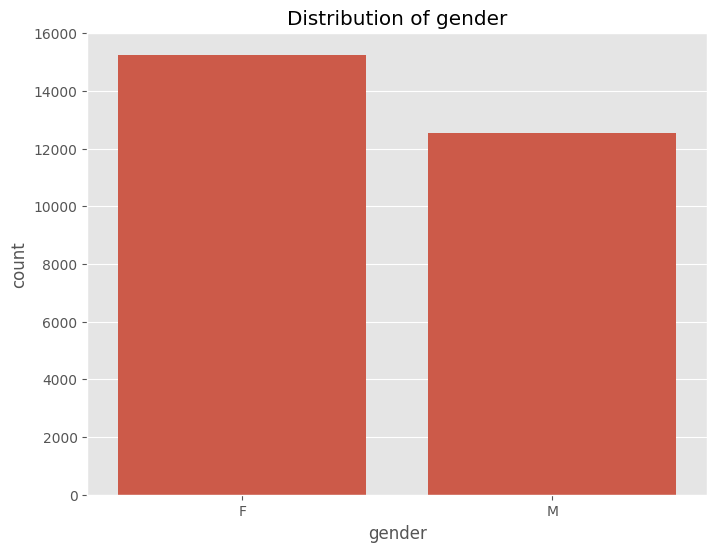

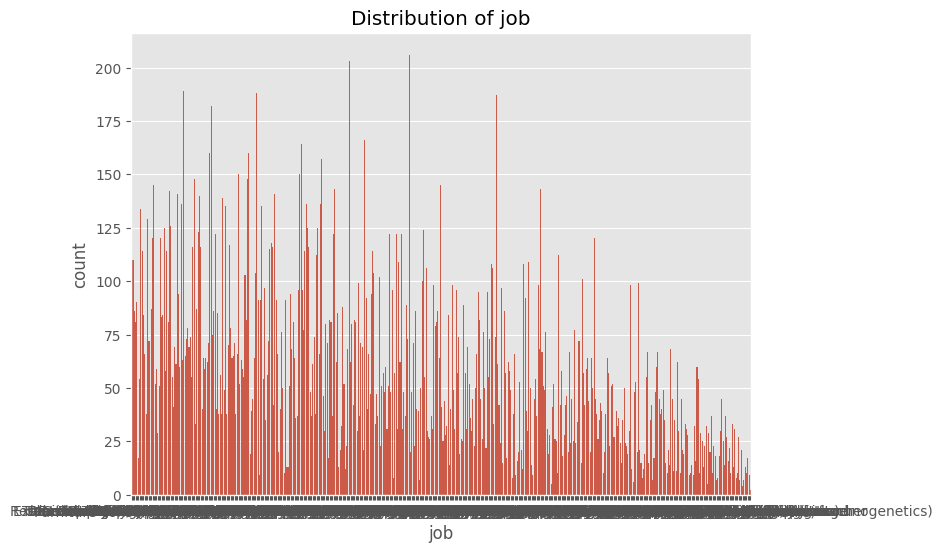

In [20]:
#plot the categorical variables
plt.style.use('ggplot')

for column in filter_catf2:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

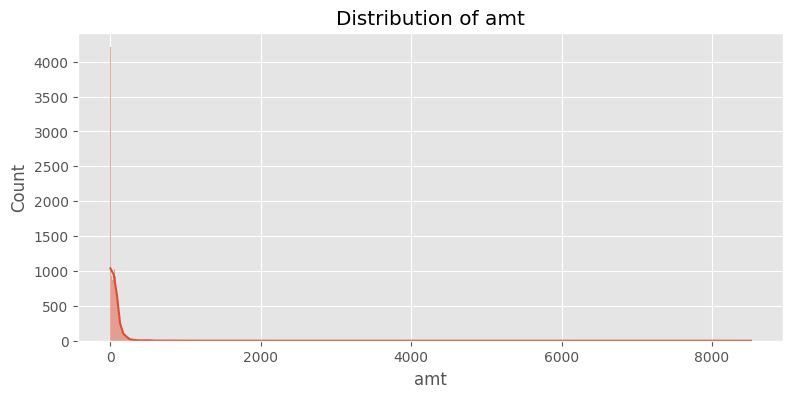

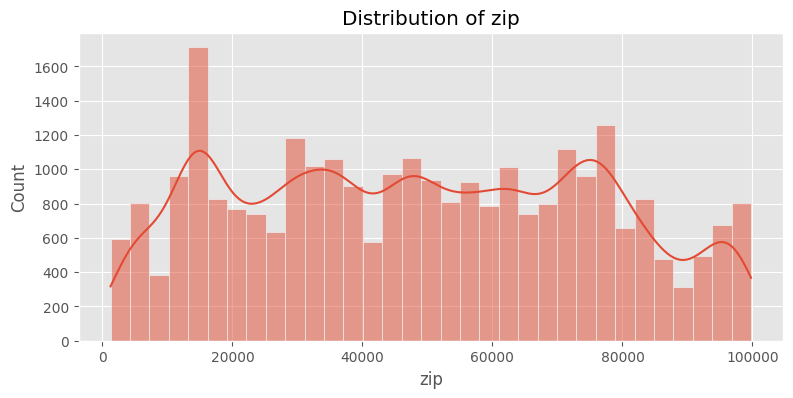

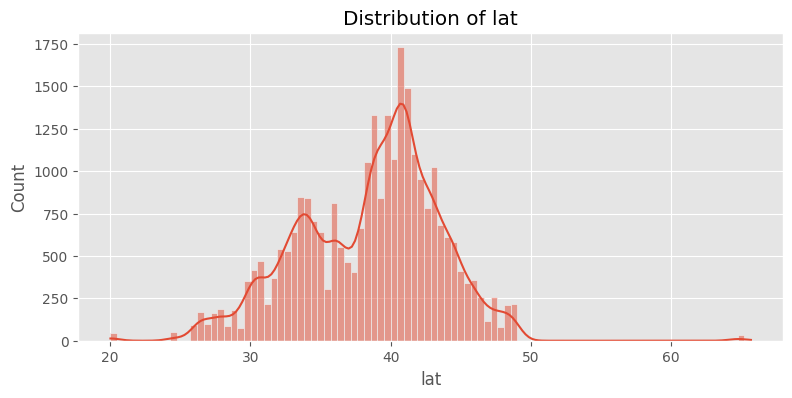

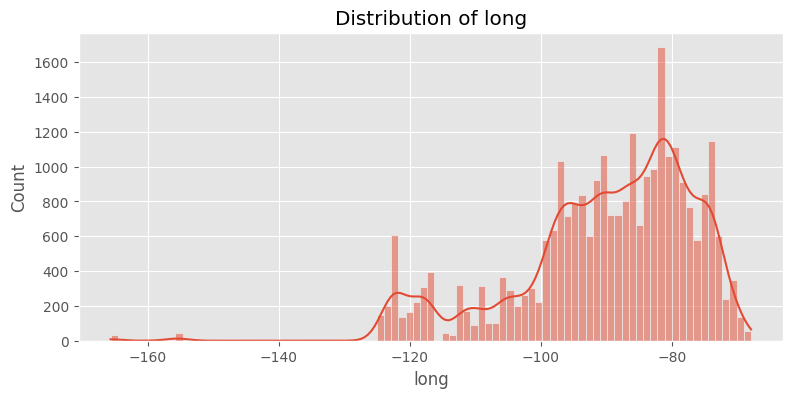

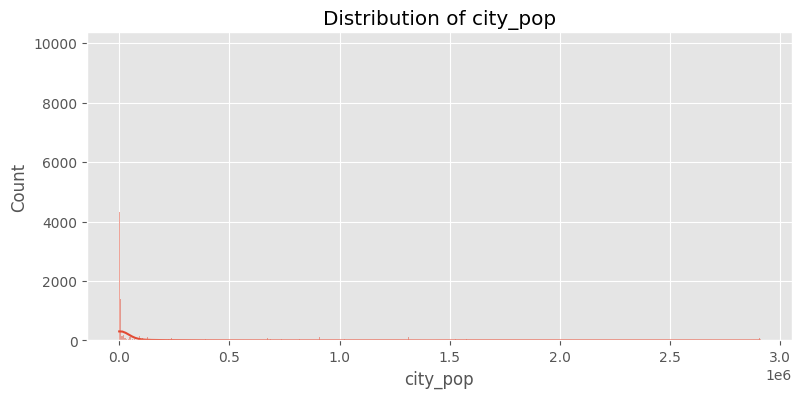

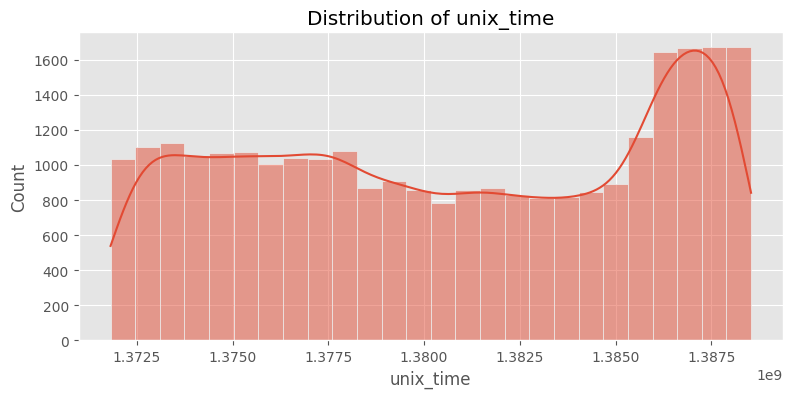

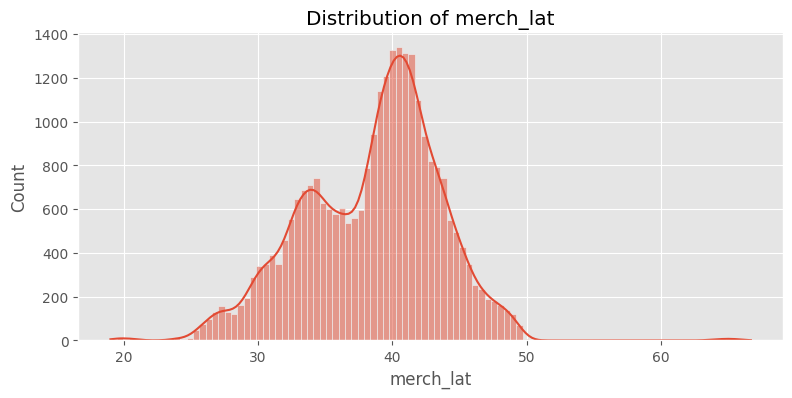

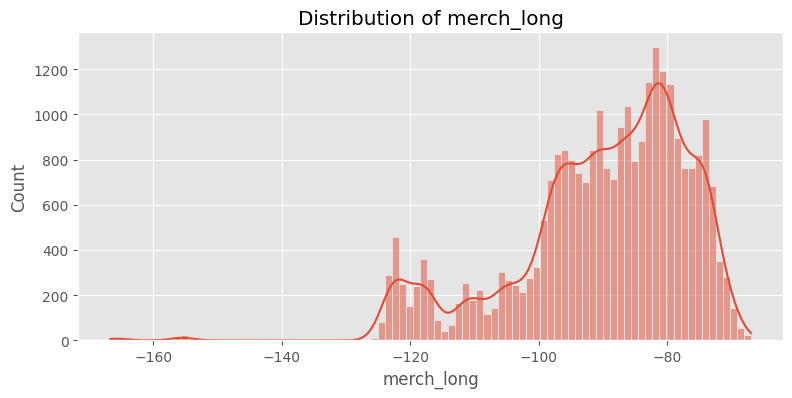

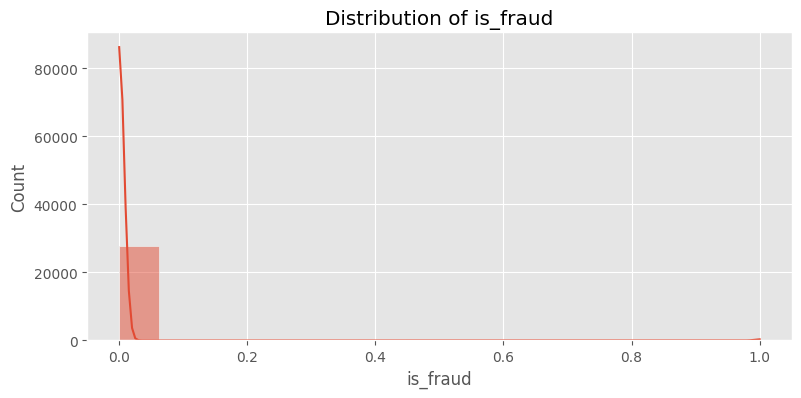

In [21]:
#plot histograms for numerical variables
plt.style.use('ggplot')
for column in filter_conf:
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde = True)
    plt.title(f'Distribution of {column}')
    plt.show()

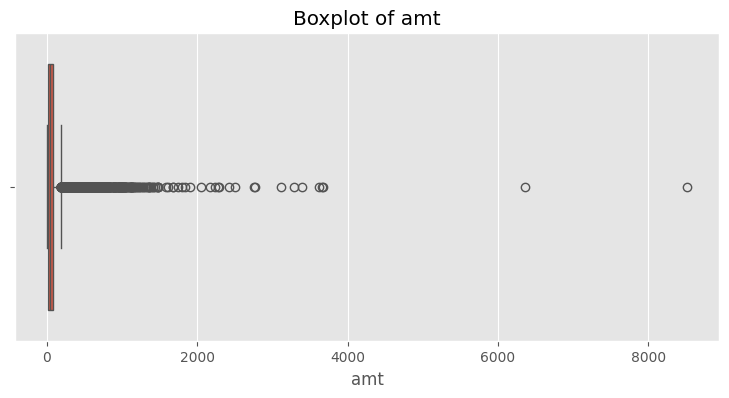

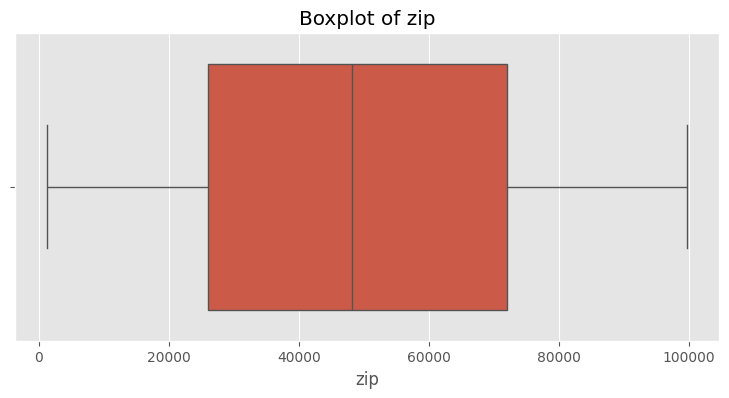

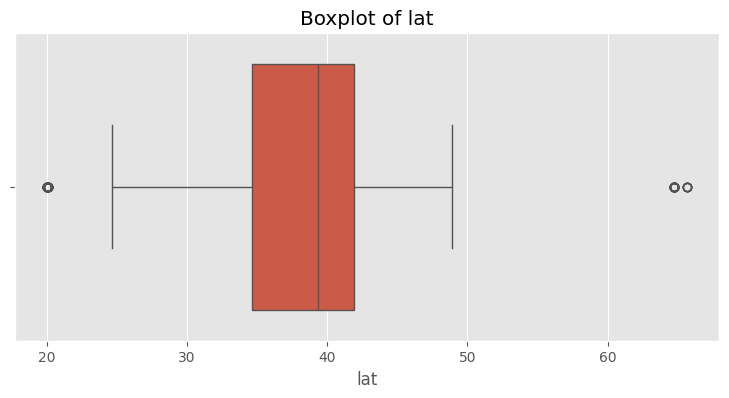

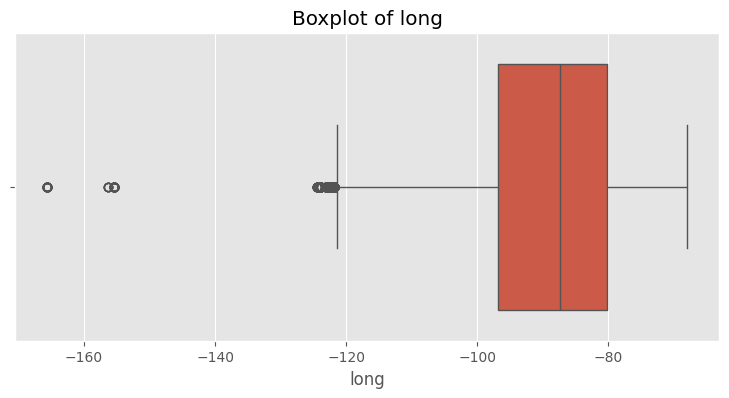

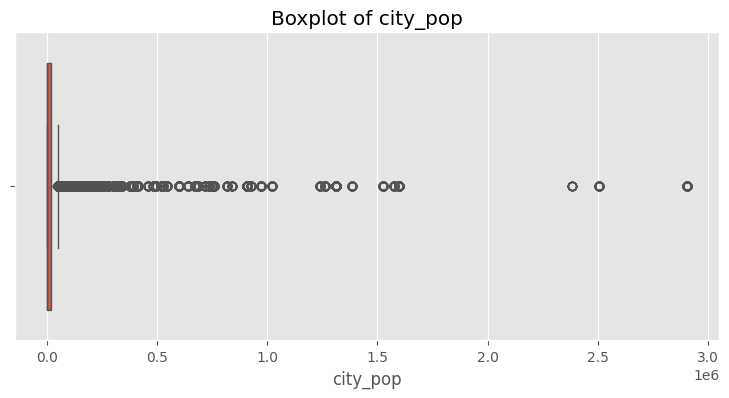

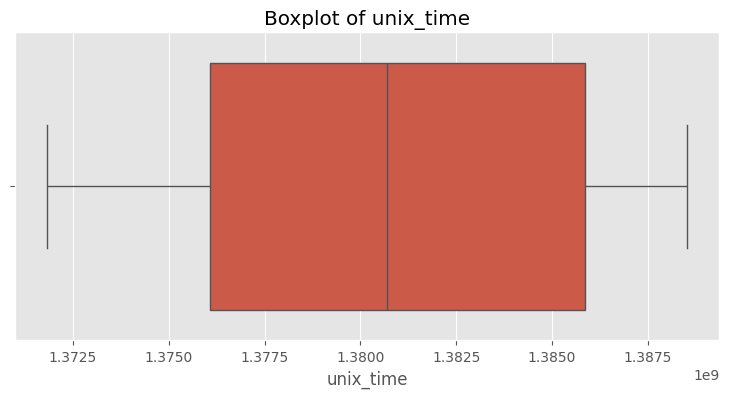

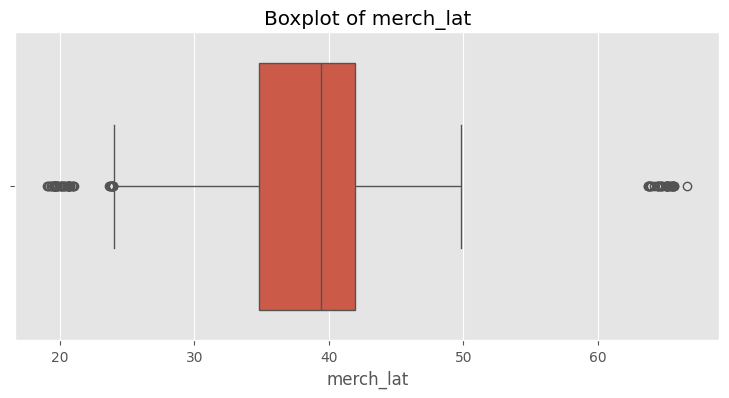

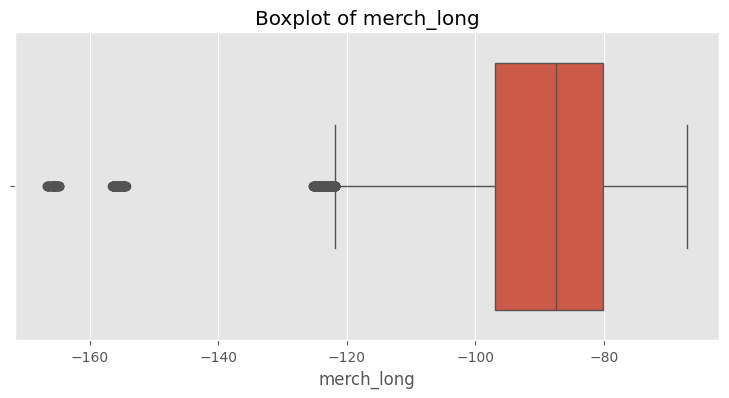

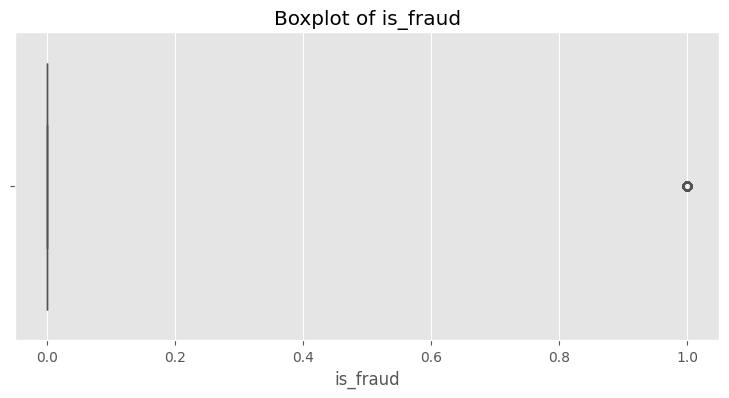

In [22]:
#plot boxplots of all continuous features
plt.style.use('ggplot')
for column in filter_conf:
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Multivariate Analysis

## Correlations

In [23]:
#correlations
corr_matrix = df[filter_conf].corr()
corr_matrix

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
amt,1.000,0.008,0.006,-0.008,0.003,-0.002,0.007,-0.008,0.206
zip,0.008,1.000,-0.122,-0.912,0.080,-0.003,-0.121,-0.911,-0.002
lat,0.006,-0.122,1.000,-0.007,-0.147,0.002,0.993,-0.006,0.014
long,-0.008,-0.912,-0.007,1.000,-0.059,0.001,-0.007,0.999,-0.003
city_pop,0.003,0.080,-0.147,-0.059,1.000,-0.007,-0.146,-0.059,-0.010
unix_time,-0.002,-0.003,0.002,0.001,-0.007,1.000,0.001,0.001,-0.010
merch_lat,0.007,-0.121,0.993,-0.007,-0.146,0.001,1.000,-0.007,0.015
merch_long,-0.008,-0.911,-0.006,0.999,-0.059,0.001,-0.007,1.000,-0.003
is_fraud,0.206,-0.002,0.014,-0.003,-0.010,-0.010,0.015,-0.003,1.000


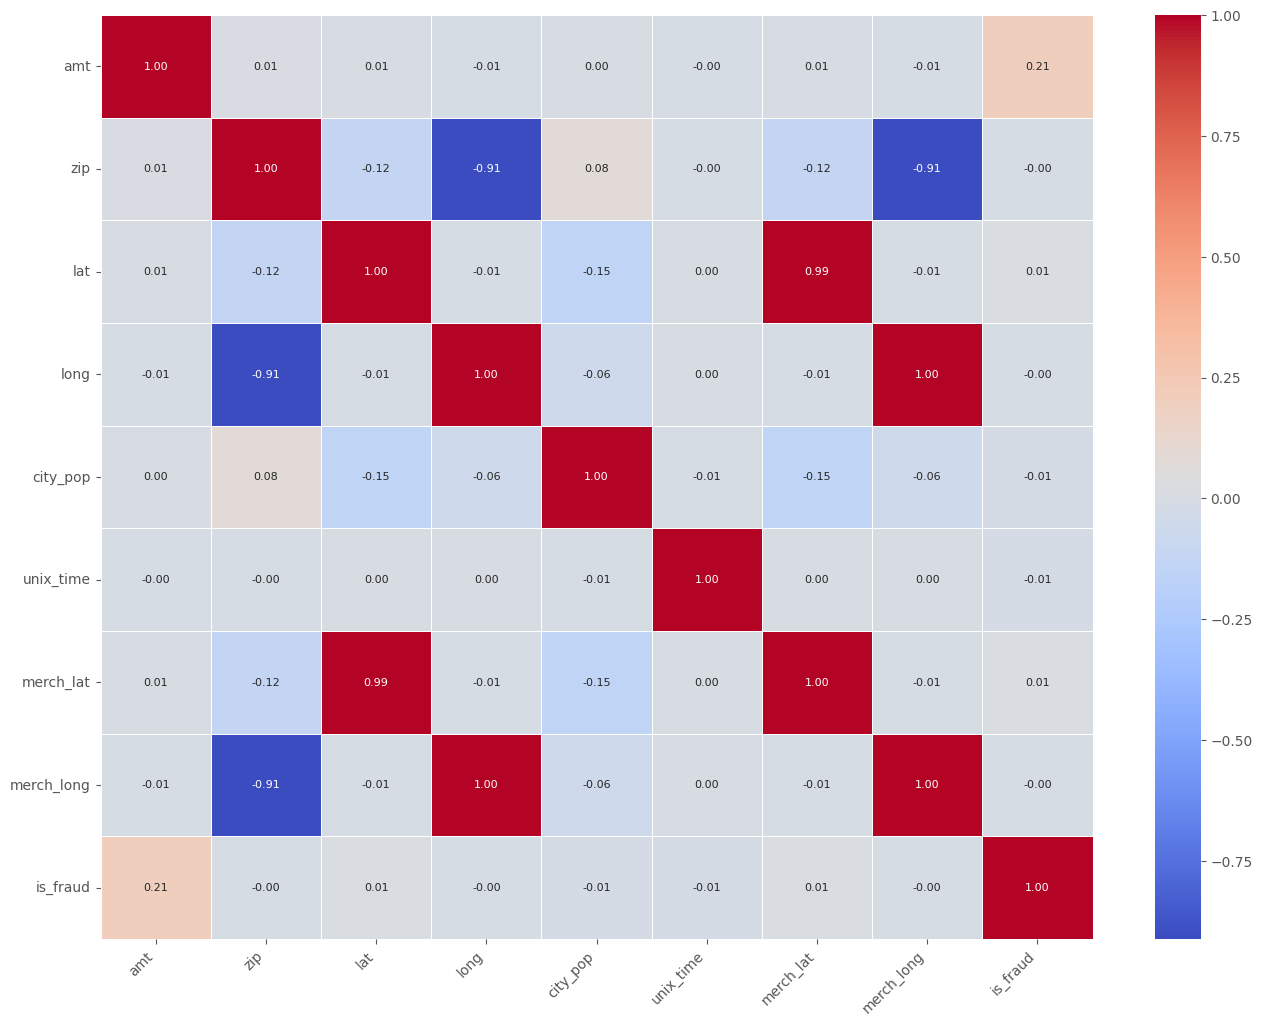

In [24]:
# Create a heatmap
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the heatmap
plt.show()

In [25]:
#filter to correlation threshold
target_column = 'is_fraud'
corr_with_target = corr_matrix[target_column].abs() #get the absolute value of features correlation to target variable
threshold = .01 #set the threshold for correlation
high_corr = corr_with_target[corr_with_target > threshold].index.tolist() #gets the list of features that meet threshold
print(high_corr)

['amt', 'lat', 'city_pop', 'merch_lat', 'is_fraud']


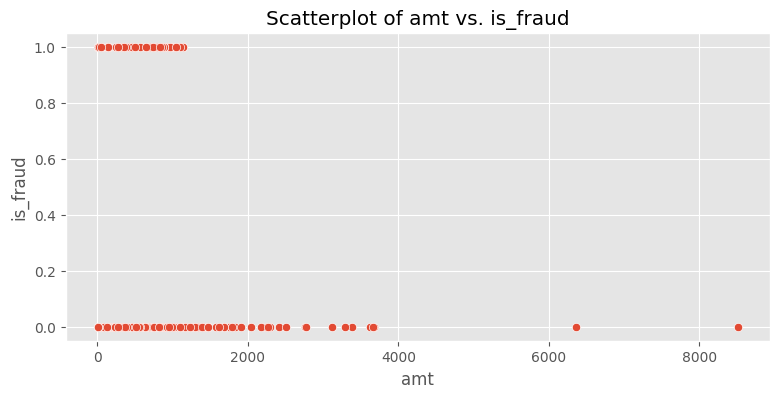

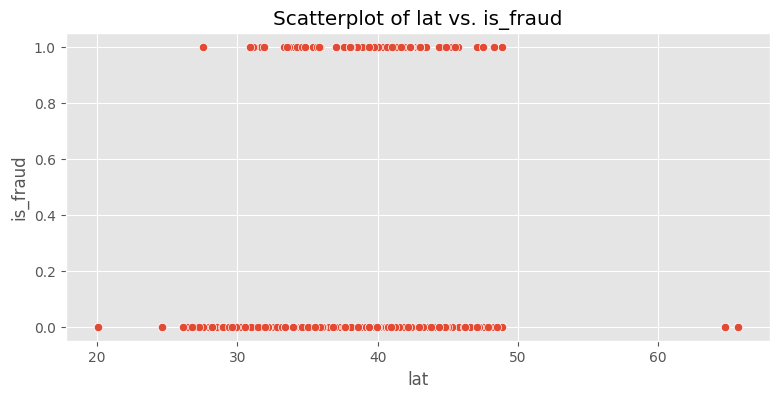

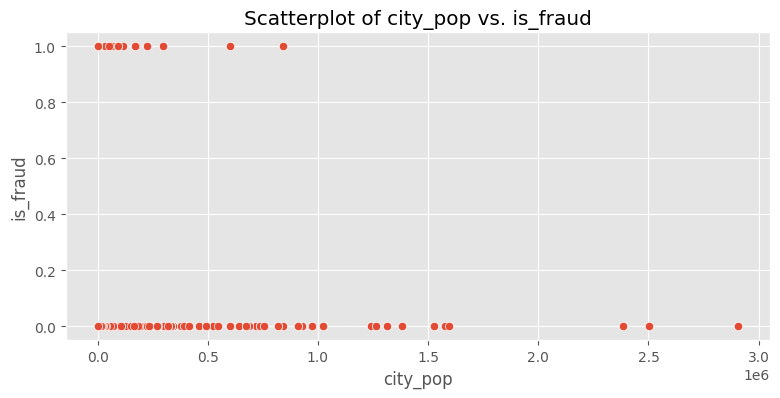

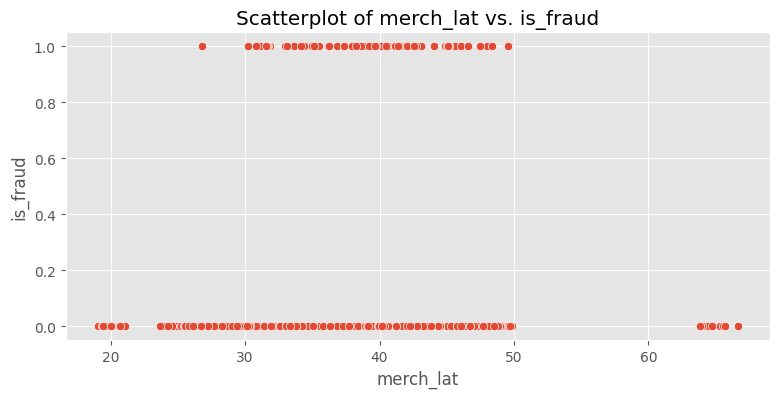

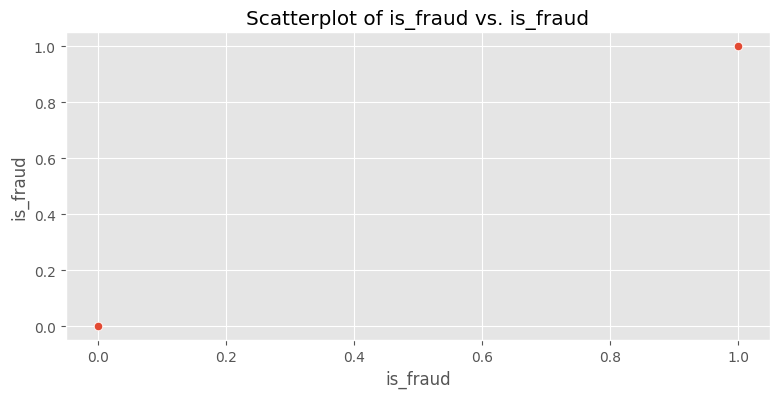

In [26]:
#plot scatterplots for threshold meeting the correlation
plt.style.use('ggplot')
for column in high_corr:
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df[column], y=df['is_fraud'])
    plt.title(f'Scatterplot of {column} vs. is_fraud')
    plt.show()

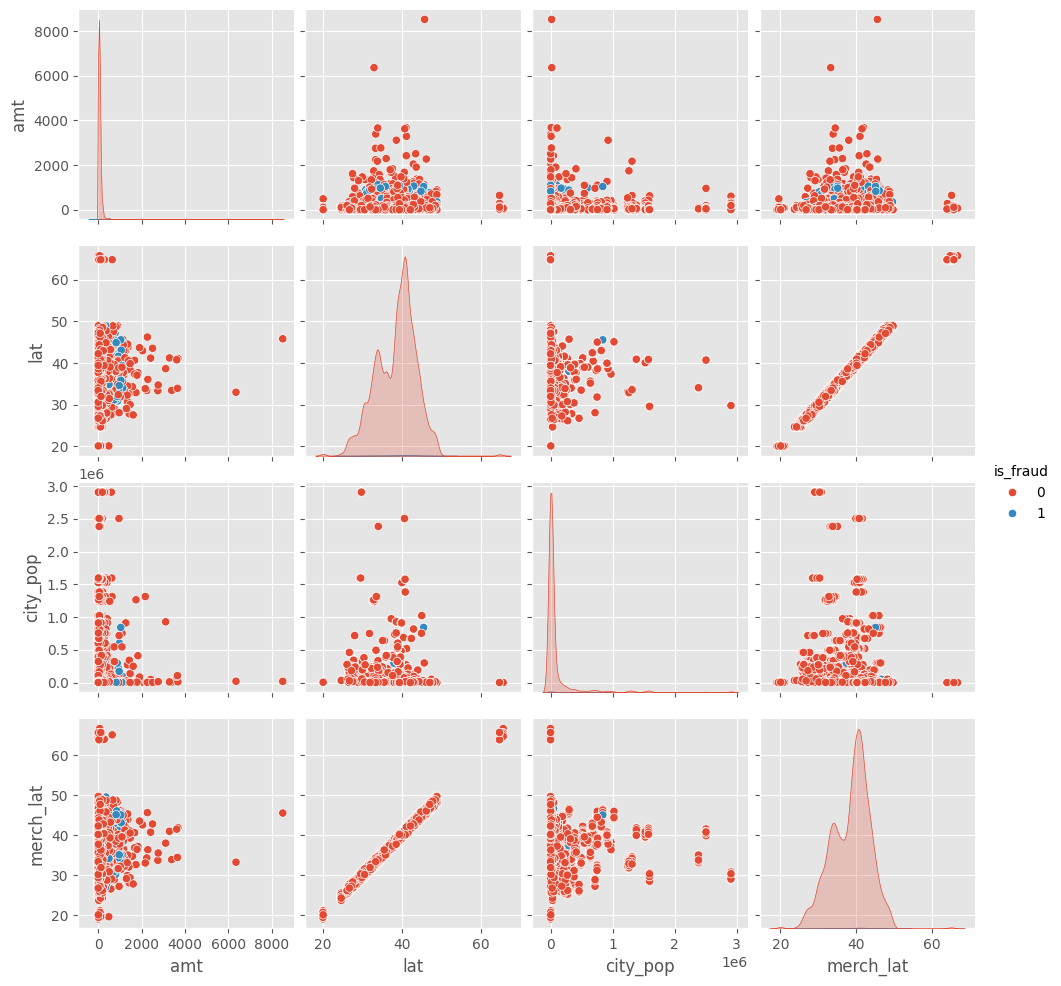

In [27]:
sns.pairplot(df[high_corr], hue='is_fraud')

In [28]:
import math
#haversine formula calculates the difference between two points. Tutorial here:
#https://www.geeksforgeeks.org/haversine-formula-to-find-distance-between-two-points-on-a-sphere/

#create haversine function
def haversine(lat1, lon1, lat2, lon2):
    # distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # convert to radians
    lat1 = lat1 * math.pi / 180.0
    lat2 = lat2 * math.pi / 180.0

    # apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371  # Earth’s radius in kilometers
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

# Assuming your dataframe is called 'df'
# and you have columns: 'lat', 'long', 'merch_lat', 'merch_long'
df['distance_km'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

# Display the updated dataframe with the distance column
print(df[['lat', 'long', 'merch_lat', 'merch_long', 'distance_km']])

         lat     long  merch_lat  merch_long  distance_km
0     40.454  -98.654     40.000     -99.040       60.200
1     33.966  -80.936     33.547     -80.976       46.722
2     42.915  -83.484     43.651     -84.041       93.483
3     44.599  -86.214     44.948     -85.290       82.612
4     20.083 -155.488     19.658    -156.016       72.611
...      ...      ...        ...         ...          ...
27780 31.957  -98.966     31.894     -99.870       85.625
27781 39.372  -77.823     40.371     -77.906      111.349
27782 39.935  -86.163     39.986     -86.364       18.056
27783 42.189  -74.923     42.298     -74.987       13.216
27784 39.406  -75.321     40.162     -75.233       84.435

[27785 rows x 5 columns]


# Pre-Processing





In [29]:
df1 = df.copy()

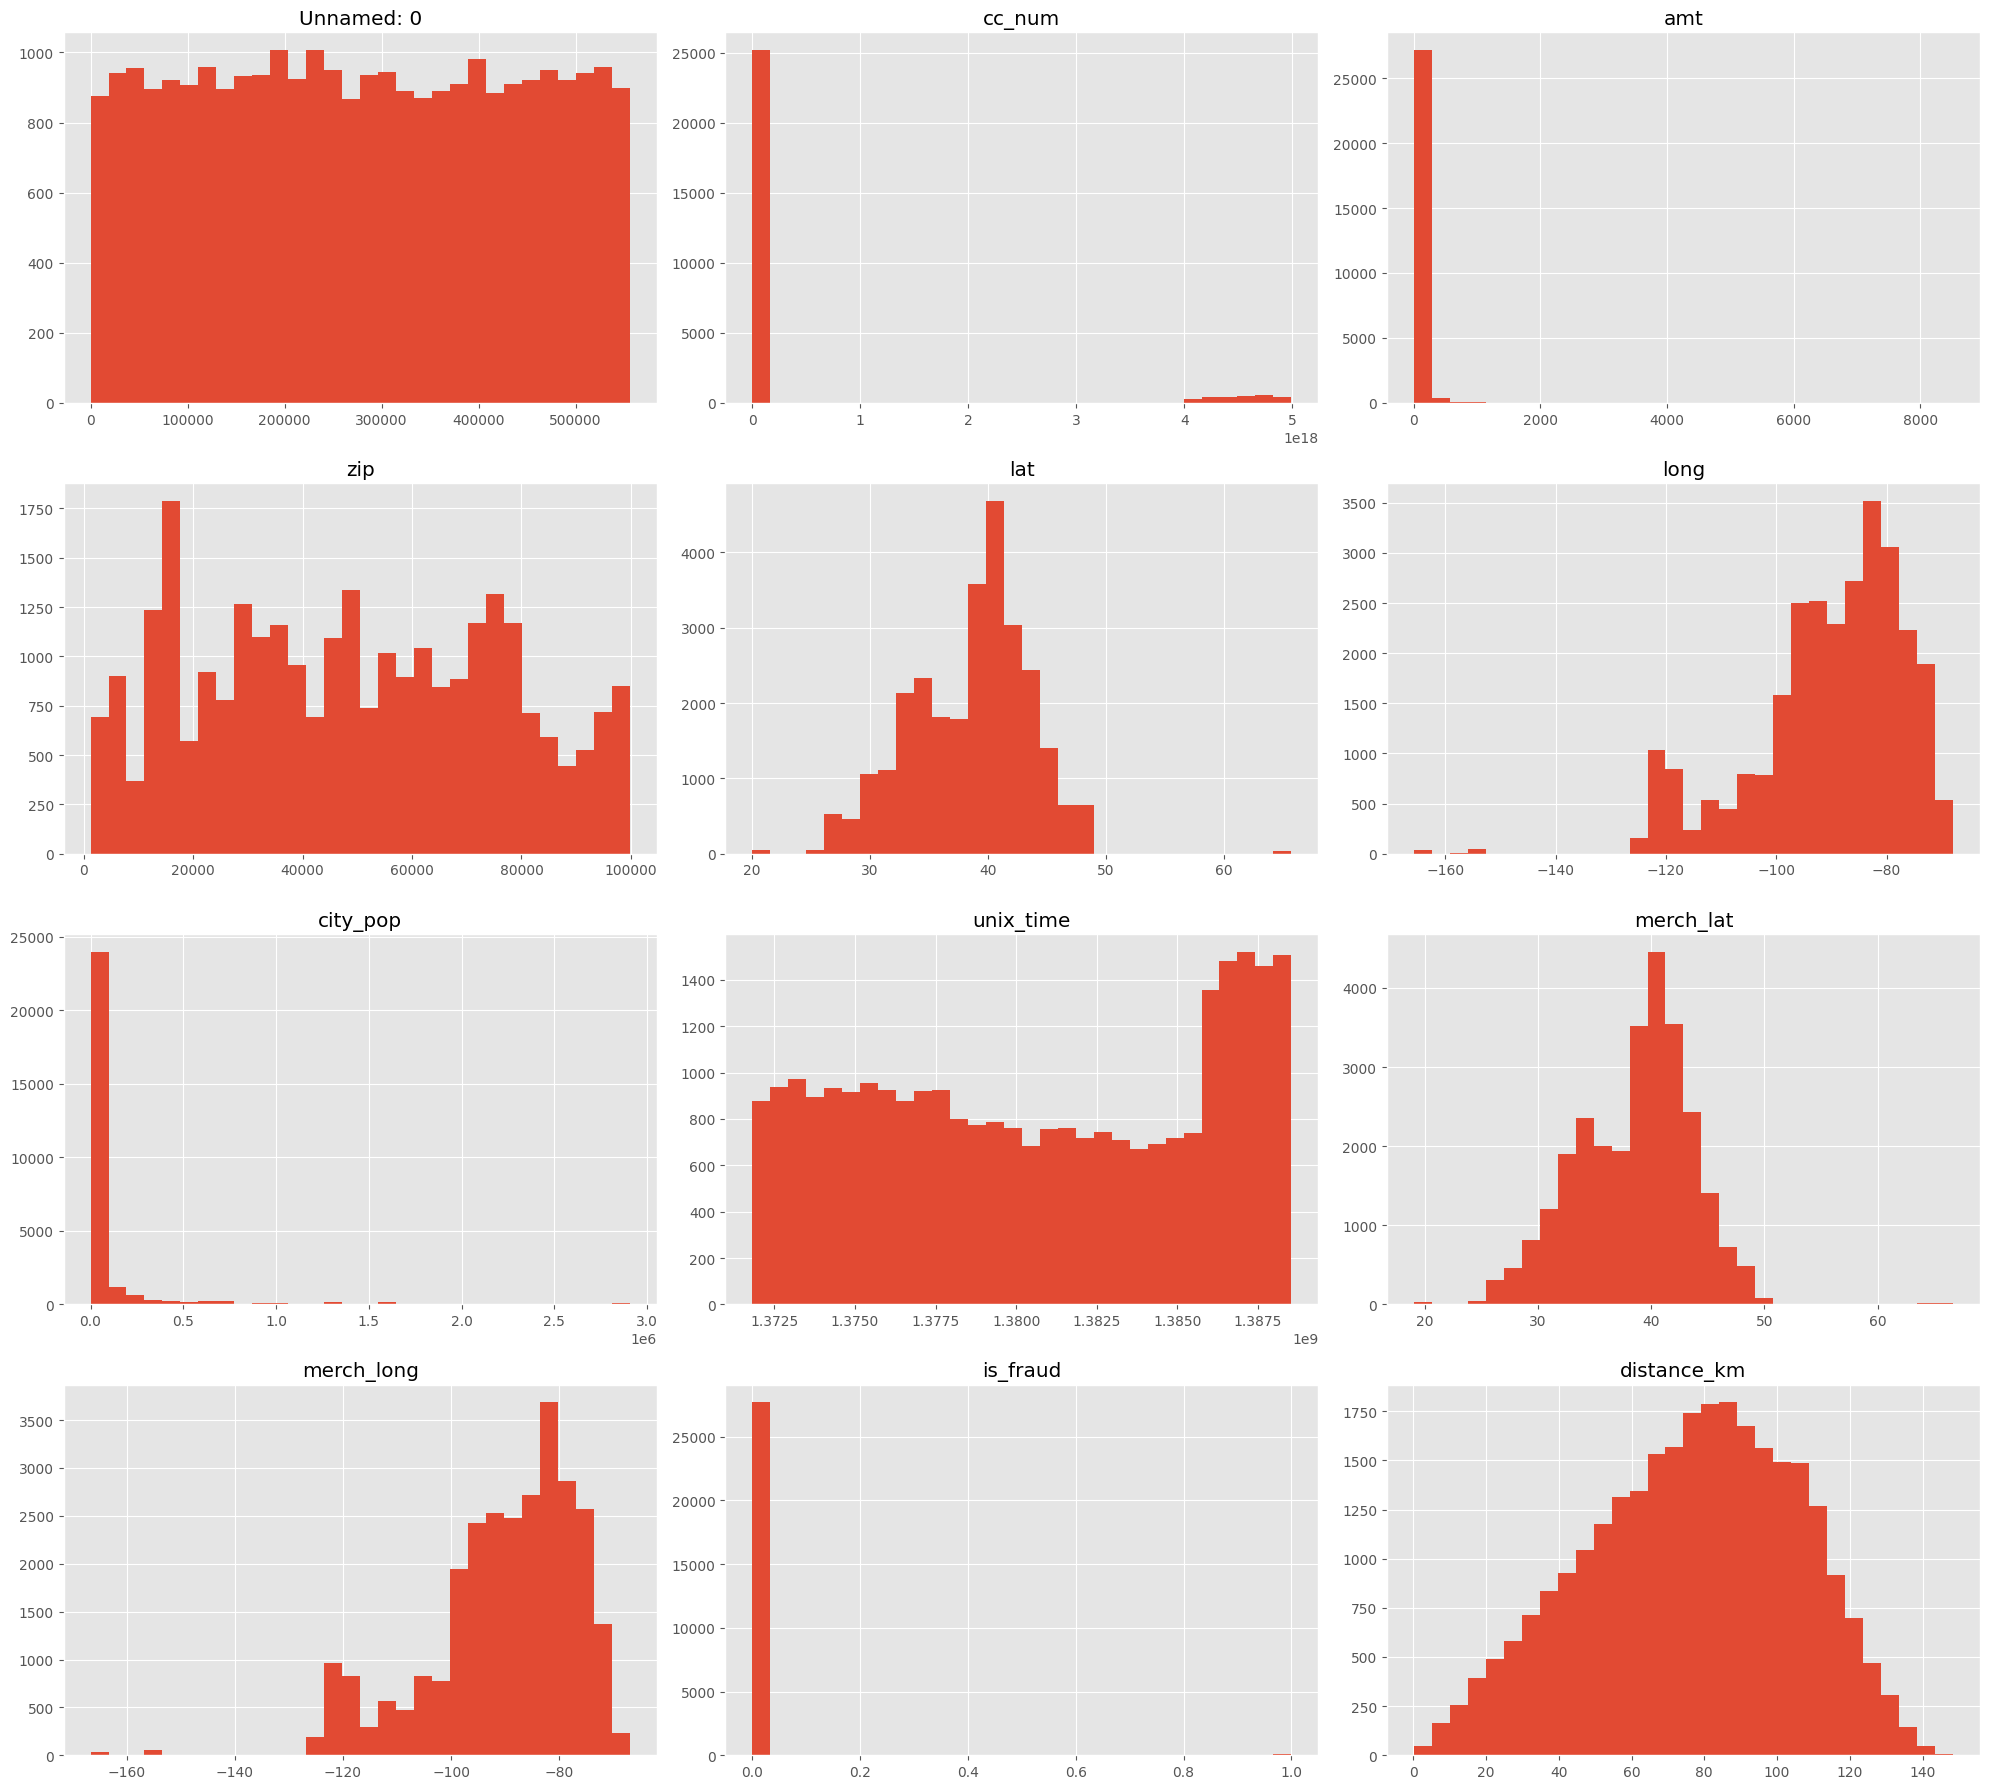

In [30]:
numerical_cols = df1.select_dtypes(include=[np.number]).columns
df1[numerical_cols].hist(bins=30, figsize=(20, 18))
plt.tight_layout()
plt.show()

Notes: long and merch_long are both left skewed. Merch_long, distance_km and unix_time need to be normalized and be on the same scale.

In [31]:
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,distance_km
0,417308,2020-12-01 05:38:34,348789608637806,fraud_Berge LLC,gas_transport,50.420,Megan,Murphy,F,53696 Laura Radial,...,-98.654,331,Telecommunications researcher,1950-08-19,dc152cdac86b839b6f535b96b249bdd5,1385876314,40.000,-99.040,0,60.200
1,22343,2020-06-29 02:05:06,2291163933867244,"fraud_Bins, Balistreri and Beatty",shopping_pos,39.470,Jeff,Elliott,M,351 Darlene Green,...,-80.936,333497,Mechanical engineer,1968-03-19,254f731157566c1129d88b1fec57ea9d,1372471506,33.547,-80.976,0,46.722
2,540530,2020-12-28 15:48:07,372509258176510,"fraud_Bradtke, Torp and Bahringer",personal_care,8.160,Kristen,Hanson,F,26544 Andrea Glen,...,-83.484,6951,Learning disability nurse,1985-06-18,cdef45931b53a75bf09e3ea265df817c,1388245687,43.651,-84.041,0,93.483
3,492286,2020-12-17 23:47:28,571365235126,"fraud_Prosacco, Kreiger and Kovacek",home,25.480,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,...,-86.214,372,"Exhibitions officer, museum/gallery",1995-07-12,15b1835cfe2cef056258d83a71e1d6f3,1387324048,44.948,-85.290,0,82.612
4,17203,2020-06-27 11:52:35,4225990116481262579,"fraud_Bernier, Volkman and Hoeger",misc_net,5.710,Brian,Simpson,M,2711 Duran Pines,...,-155.488,4878,Physiotherapist,1966-12-03,10b26afaa3610fe336b15e95522b3390,1372333955,19.658,-156.016,0,72.611


## Transformation

Transform DOB to be generations, and drop it.

*   Silent Generation: Born before 1945
*   Baby Boomers: 1946–1964
*   Generation X: 1965–1980
*   Millennials (Gen Y): 1981–1996
*   Generation Z (Gen Z): 1997–2012
*   Generation Alpha: 2013 and later

In [32]:
 import pandas as pd

# Assuming df1 is already defined with a 'DOB' column

# Convert 'DOB' column to datetime format
df1['dob'] = pd.to_datetime(df1['dob'], format='%Y-%m-%d')

# Function to categorize generations into numerical format
def categorize_generation(dob):
    if dob < pd.Timestamp('1945-01-01'):
        return 0  # Silent Generation
    elif dob < pd.Timestamp('1965-01-01'):
        return 1  # Baby Boomers
    elif dob < pd.Timestamp('1981-01-01'):
        return 2  # Generation X
    elif dob < pd.Timestamp('1997-01-01'):
        return 3  # Millennials
    elif dob < pd.Timestamp('2013-01-01'):
        return 4  # Generation Z
    else:
        return 5  # Generation Alpha

# Apply the function to create a new column for generations in numerical format
df1['Generation_Numeric'] = df1['dob'].apply(categorize_generation)

# Drop the original 'DOB' column
df1.drop(columns=['dob'], inplace=True)

# Display the updated DataFrame
df1.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,distance_km,Generation_Numeric
0,417308,2020-12-01 05:38:34,348789608637806,fraud_Berge LLC,gas_transport,50.420,Megan,Murphy,F,53696 Laura Radial,...,-98.654,331,Telecommunications researcher,dc152cdac86b839b6f535b96b249bdd5,1385876314,40.000,-99.040,0,60.200,1
1,22343,2020-06-29 02:05:06,2291163933867244,"fraud_Bins, Balistreri and Beatty",shopping_pos,39.470,Jeff,Elliott,M,351 Darlene Green,...,-80.936,333497,Mechanical engineer,254f731157566c1129d88b1fec57ea9d,1372471506,33.547,-80.976,0,46.722,2
2,540530,2020-12-28 15:48:07,372509258176510,"fraud_Bradtke, Torp and Bahringer",personal_care,8.160,Kristen,Hanson,F,26544 Andrea Glen,...,-83.484,6951,Learning disability nurse,cdef45931b53a75bf09e3ea265df817c,1388245687,43.651,-84.041,0,93.483,3
3,492286,2020-12-17 23:47:28,571365235126,"fraud_Prosacco, Kreiger and Kovacek",home,25.480,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,...,-86.214,372,"Exhibitions officer, museum/gallery",15b1835cfe2cef056258d83a71e1d6f3,1387324048,44.948,-85.290,0,82.612,3
4,17203,2020-06-27 11:52:35,4225990116481262579,"fraud_Bernier, Volkman and Hoeger",misc_net,5.710,Brian,Simpson,M,2711 Duran Pines,...,-155.488,4878,Physiotherapist,10b26afaa3610fe336b15e95522b3390,1372333955,19.658,-156.016,0,72.611,2


Transforming city_pop to

https://www.oecd.org/en/data/indicators/urban-population-by-city-size.html?oecdcontrol-38c744bfa4-var1=USA%7COAVG

*   large metropolitan areas if they have a population of 1.5 million or more;
*   metropolitan areas if their population is between 500 000 and 1.5 million;
*   List item*   medium-size urban areas if their population is between 200 000 and 500 000;
*   small urban areas if their population is between 50 000 and 200 000.





In [33]:
# Define a function to categorize city populations based on OECD standards
def categorize_city_pop_oecd(city_pop):
    if city_pop >= 1500000:
        return 'Large Metropolitan Area'
    elif 500000 <= city_pop < 1500000:
        return 'Metropolitan Area'
    elif 200000 <= city_pop < 500000:
        return 'Medium-Size Urban Area'
    elif 50000 <= city_pop < 200000:
        return 'Small Urban Area'
    else:
        return 'Rural Area'

# Apply the function to the city_pop column in df1
df1['city_pop_category'] = df1['city_pop'].apply(categorize_city_pop_oecd)

# Display the updated dataframe with the new column
print(df1[['city_pop', 'city_pop_category']].head())


   city_pop       city_pop_category
0       331              Rural Area
1    333497  Medium-Size Urban Area
2      6951              Rural Area
3       372              Rural Area
4      4878              Rural Area


In [34]:
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,distance_km,Generation_Numeric,city_pop_category
0,417308,2020-12-01 05:38:34,348789608637806,fraud_Berge LLC,gas_transport,50.420,Megan,Murphy,F,53696 Laura Radial,...,331,Telecommunications researcher,dc152cdac86b839b6f535b96b249bdd5,1385876314,40.000,-99.040,0,60.200,1,Rural Area
1,22343,2020-06-29 02:05:06,2291163933867244,"fraud_Bins, Balistreri and Beatty",shopping_pos,39.470,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,254f731157566c1129d88b1fec57ea9d,1372471506,33.547,-80.976,0,46.722,2,Medium-Size Urban Area
2,540530,2020-12-28 15:48:07,372509258176510,"fraud_Bradtke, Torp and Bahringer",personal_care,8.160,Kristen,Hanson,F,26544 Andrea Glen,...,6951,Learning disability nurse,cdef45931b53a75bf09e3ea265df817c,1388245687,43.651,-84.041,0,93.483,3,Rural Area
3,492286,2020-12-17 23:47:28,571365235126,"fraud_Prosacco, Kreiger and Kovacek",home,25.480,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,...,372,"Exhibitions officer, museum/gallery",15b1835cfe2cef056258d83a71e1d6f3,1387324048,44.948,-85.290,0,82.612,3,Rural Area
4,17203,2020-06-27 11:52:35,4225990116481262579,"fraud_Bernier, Volkman and Hoeger",misc_net,5.710,Brian,Simpson,M,2711 Duran Pines,...,4878,Physiotherapist,10b26afaa3610fe336b15e95522b3390,1372333955,19.658,-156.016,0,72.611,2,Rural Area


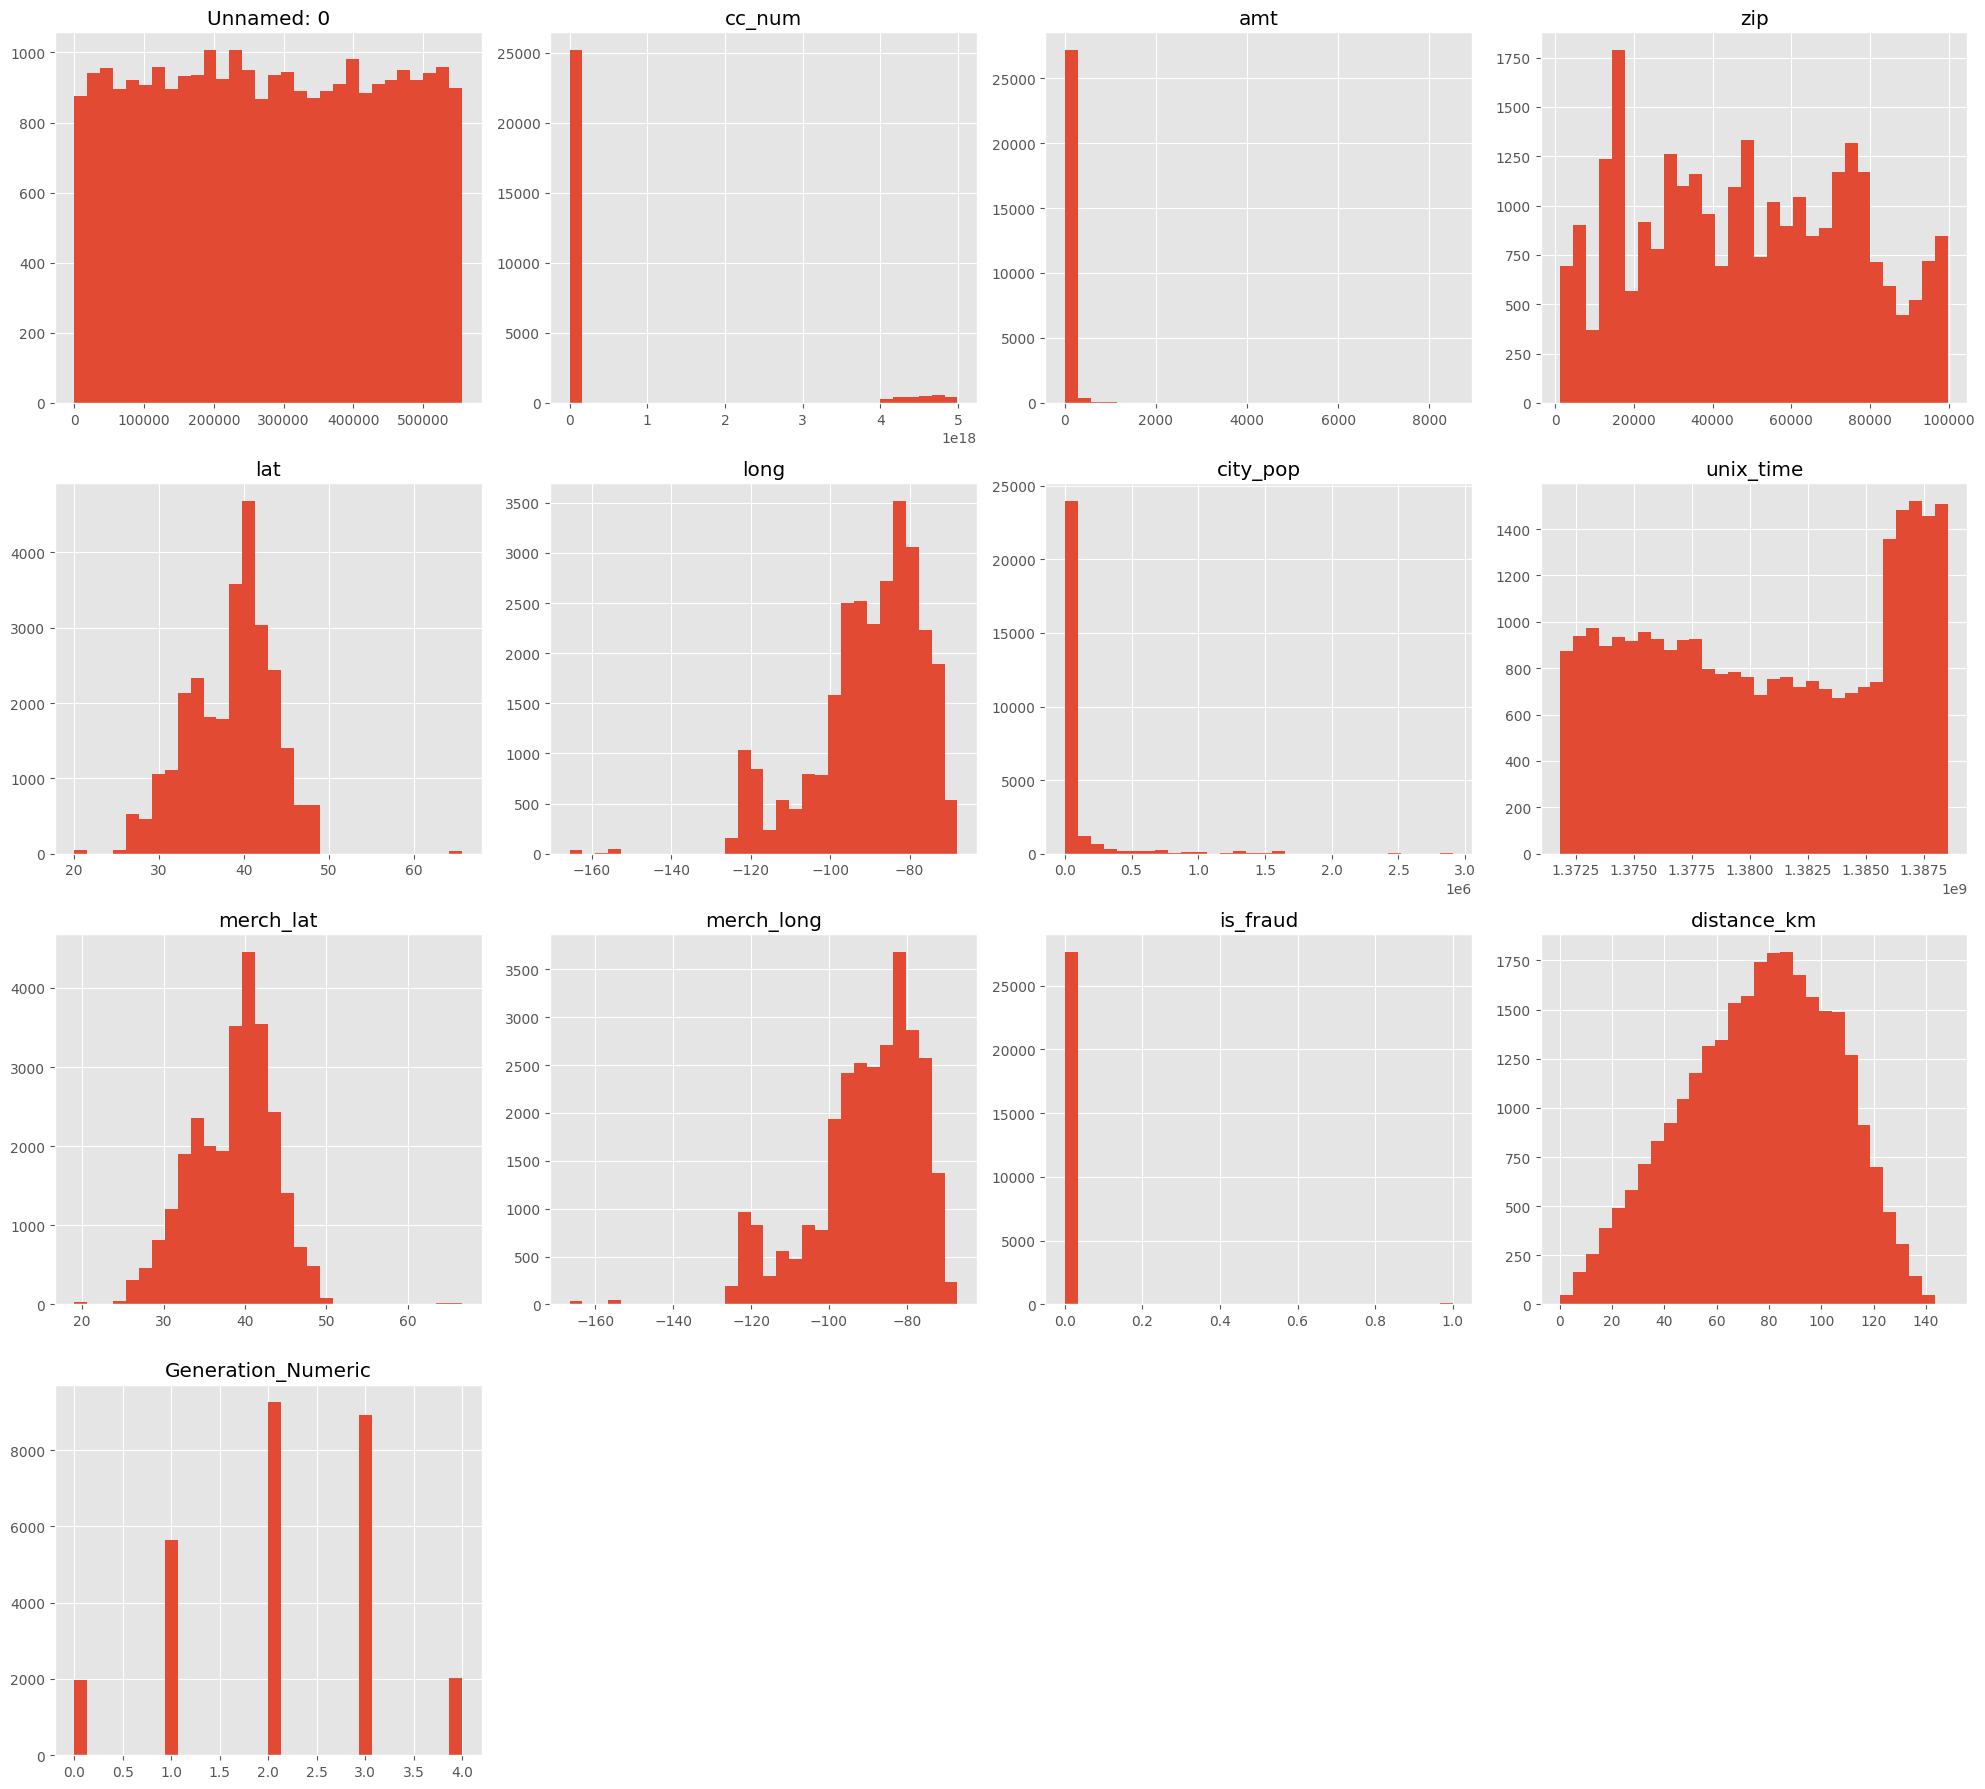

In [35]:
numerical_cols = df1.select_dtypes(include=[np.number]).columns
df1[numerical_cols].hist(bins=30, figsize=(20, 18))
plt.tight_layout()
plt.show()

Ensuring merchant's unique values

In [36]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the merchant column is 'merchant'
merchant_counts = df['merchant'].value_counts()

# Calculate the total frequency
total_frequency = merchant_counts.sum()

# Display the total frequency and compare it to the expected total
expected_total = 27785
print("Total Frequency of Merchants:", total_frequency)
print("Expected Total Frequency:", expected_total)

# Check if they match
if total_frequency == expected_total:
    print("The total frequency matches the expected total.")
else:
    print("The total frequency does not match the expected total.")


Total Frequency of Merchants: 27785
Expected Total Frequency: 27785
The total frequency matches the expected total.


Transforming trans_date_trans_time to temporal features

In [37]:

import pandas as pd

# Assuming df1 is already defined and 'trans_date_trans_time' is in datetime format
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])

# Extract temporal features
df1['day_of_week'] = df1['trans_date_trans_time'].dt.dayofweek
df1['hour_of_day'] = df1['trans_date_trans_time'].dt.hour
df1['month'] = df1['trans_date_trans_time'].dt.month
df1['quarter'] = df1['trans_date_trans_time'].dt.quarter

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'noon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df1['time_of_day'] = df1['hour_of_day'].apply(categorize_time_of_day)
df1['is_weekend'] = df1['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Display the updated DataFrame with new features
features_to_display = ['trans_date_trans_time', 'day_of_week', 'hour_of_day', 'month', 'quarter', 'time_of_day', 'is_weekend']

# Display only the selected features (without rolling_avg)
df1[features_to_display].head()


,trans_date_trans_time,day_of_week,hour_of_day,month,quarter,time_of_day,is_weekend
0,2020-12-01 05:38:34,1,5,12,4,morning,0
1,2020-06-29 02:05:06,0,2,6,2,night,0
2,2020-12-28 15:48:07,0,15,12,4,noon,0
3,2020-12-17 23:47:28,3,23,12,4,night,0
4,2020-06-27 11:52:35,5,11,6,2,morning,1


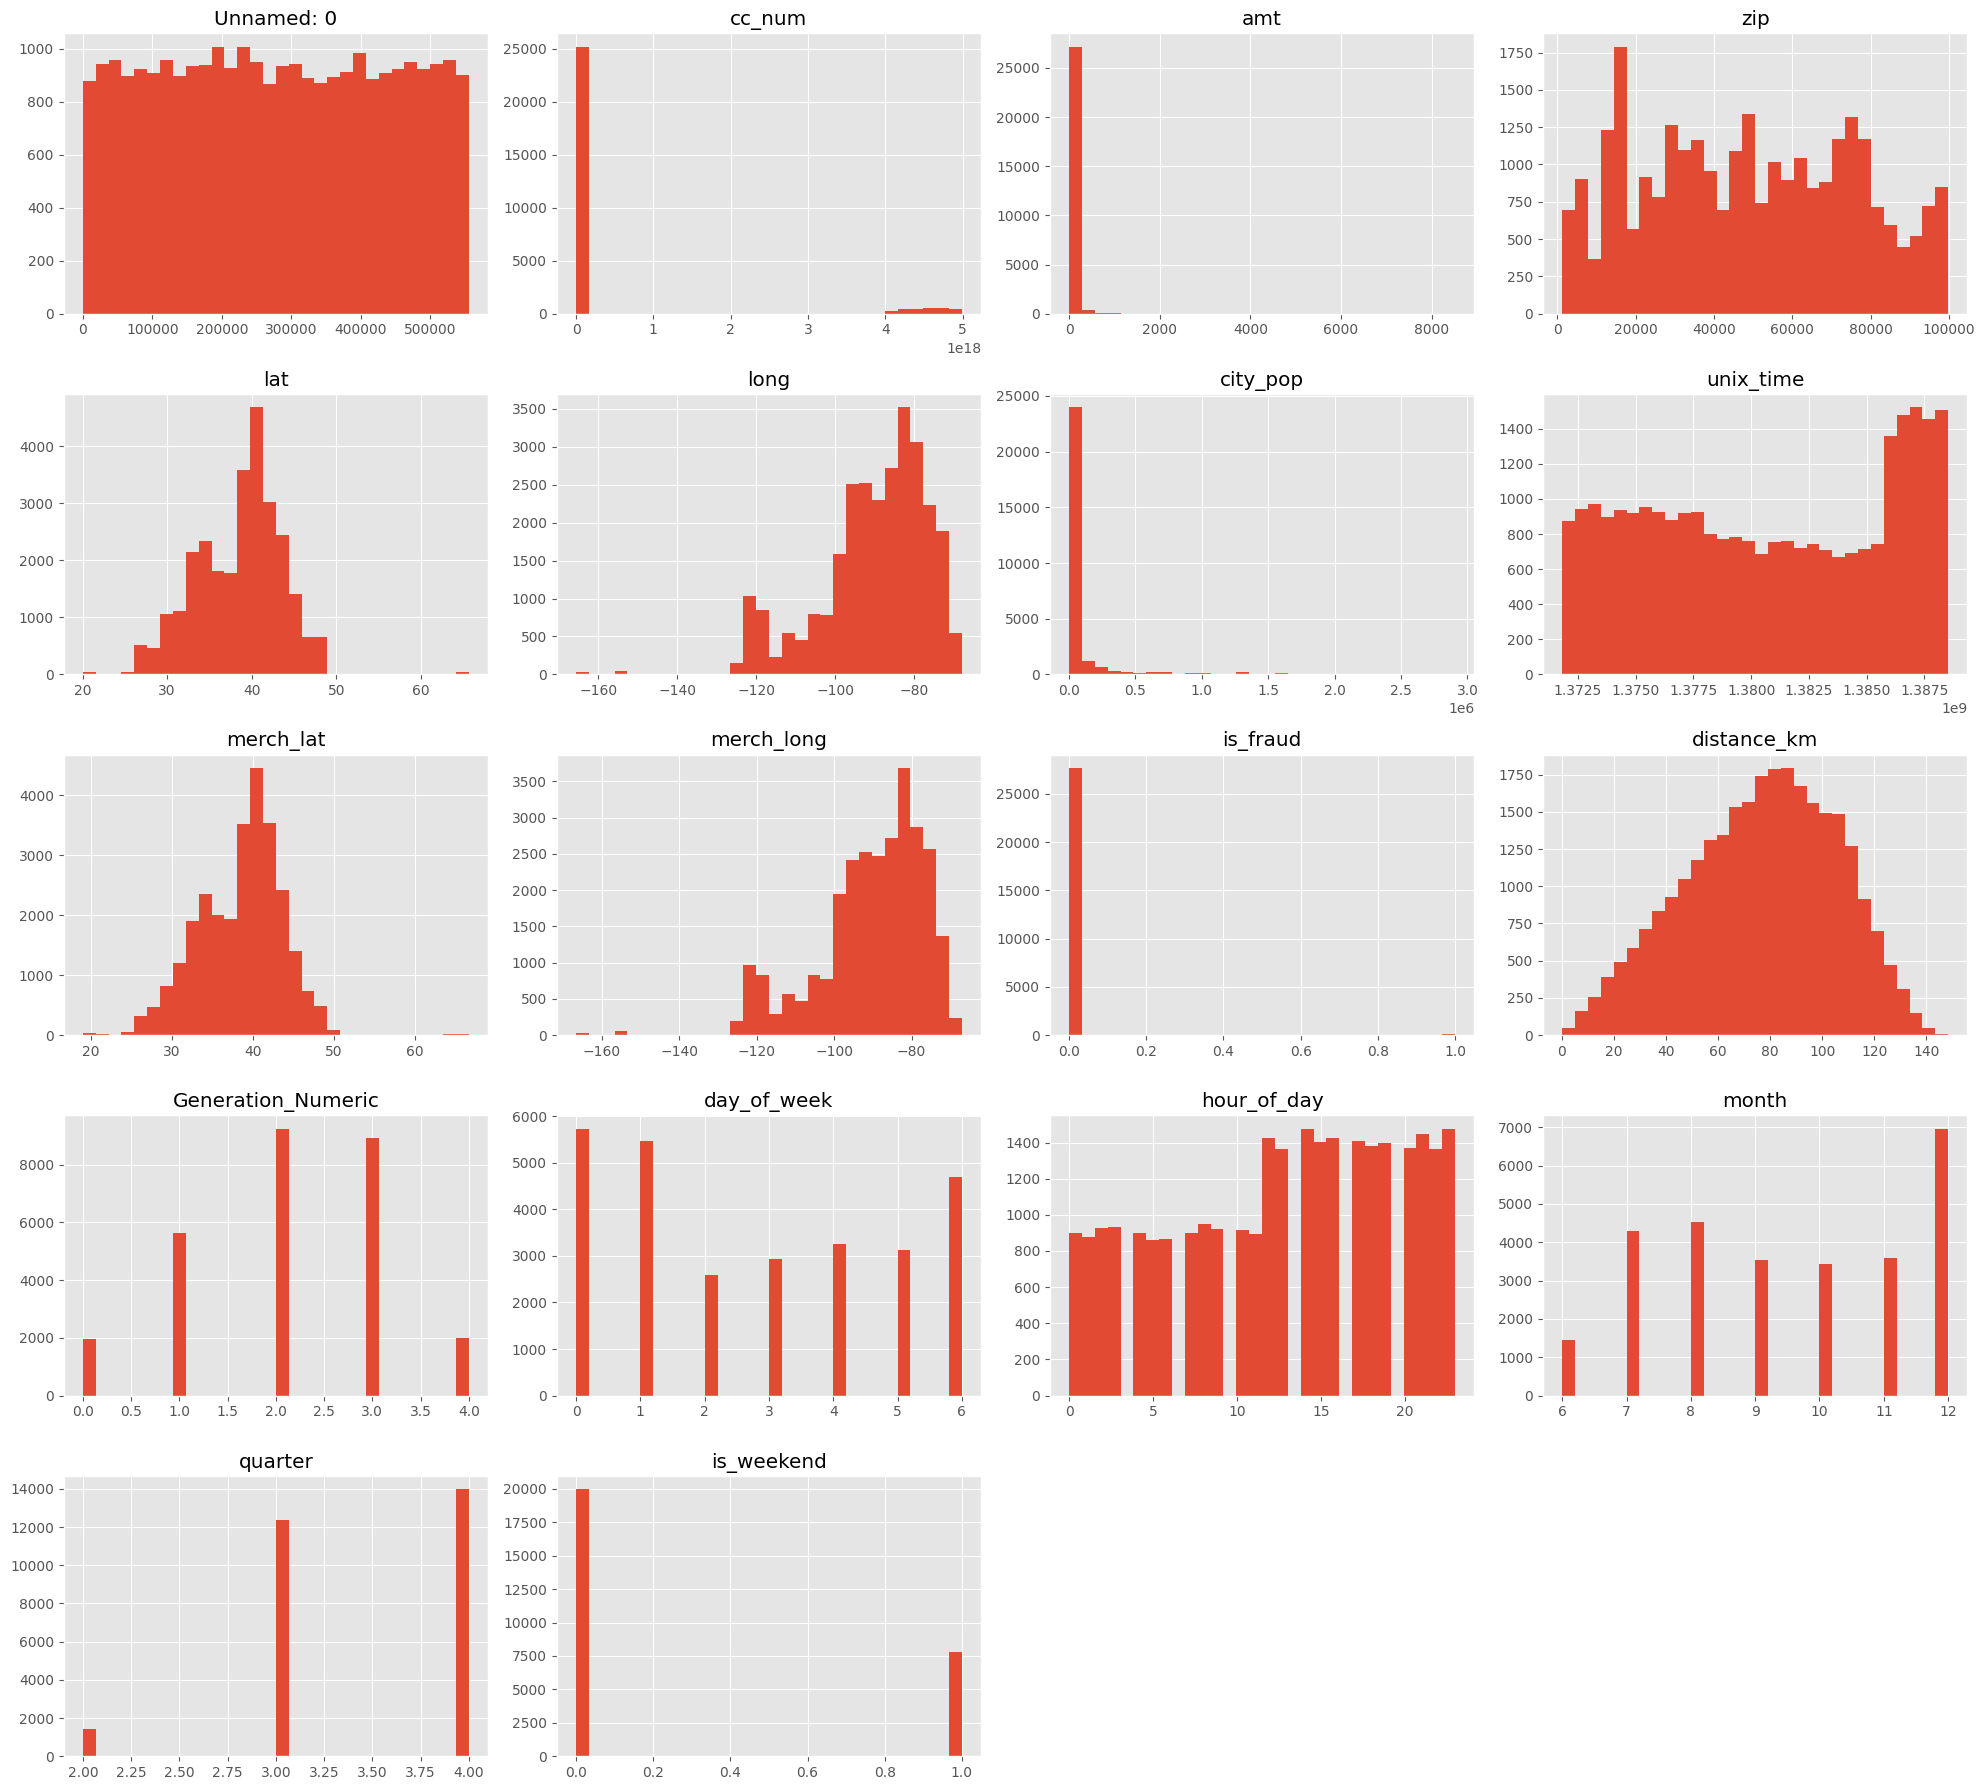

In [38]:
numerical_cols = df1.select_dtypes(include=[np.number]).columns
df1[numerical_cols].hist(bins=30, figsize=(20, 18))
plt.tight_layout()
plt.show()

Dropping unnecessary columns

In [39]:
import pandas as pd

# Assuming df1 is already defined
df2 = df1.copy()  # Create a copy of df1

# Drop the specified columns
columns_to_drop = [
    'Unnamed: 0',
    'first',
    'last',
    'city',
    'state',
    'zip',
    'lat',
    'long',
    'trans_num',
    'unix_time'
]

df2.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # Drop columns and ignore errors if any column does not exist

# Display the updated DataFrame df2
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city_pop,job,merch_lat,...,is_fraud,distance_km,Generation_Numeric,city_pop_category,day_of_week,hour_of_day,month,quarter,time_of_day,is_weekend
0,2020-12-01 05:38:34,348789608637806,fraud_Berge LLC,gas_transport,50.420,F,53696 Laura Radial,331,Telecommunications researcher,40.000,...,0,60.200,1,Rural Area,1,5,12,4,morning,0
1,2020-06-29 02:05:06,2291163933867244,"fraud_Bins, Balistreri and Beatty",shopping_pos,39.470,M,351 Darlene Green,333497,Mechanical engineer,33.547,...,0,46.722,2,Medium-Size Urban Area,0,2,6,2,night,0
2,2020-12-28 15:48:07,372509258176510,"fraud_Bradtke, Torp and Bahringer",personal_care,8.160,F,26544 Andrea Glen,6951,Learning disability nurse,43.651,...,0,93.483,3,Rural Area,0,15,12,4,noon,0
3,2020-12-17 23:47:28,571365235126,"fraud_Prosacco, Kreiger and Kovacek",home,25.480,F,0069 Robin Brooks Apt. 695,372,"Exhibitions officer, museum/gallery",44.948,...,0,82.612,3,Rural Area,3,23,12,4,night,0
4,2020-06-27 11:52:35,4225990116481262579,"fraud_Bernier, Volkman and Hoeger",misc_net,5.710,M,2711 Duran Pines,4878,Physiotherapist,19.658,...,0,72.611,2,Rural Area,5,11,6,2,morning,1


Convert Catagorical to Dummy Variables

https://www.geeksforgeeks.org/python-pandas-get_dummies-method/

In [40]:
# Displaying all columns in the dataset df1 along with their data types
all_columns_info = df2.dtypes
print(all_columns_info)


trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
gender                           object
street                           object
city_pop                          int64
job                              object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
distance_km                     float64
Generation_Numeric                int64
city_pop_category                object
day_of_week                       int32
hour_of_day                       int32
month                             int32
quarter                           int32
time_of_day                      object
is_weekend                        int64
dtype: object


In [41]:
import pandas as pd

# One-hot encoding for the specified categorical columns
df3 = pd.get_dummies(df2,
                     columns=['merchant', 'category', 'city_pop_category','gender', 'street', 'job', 'time_of_day'],
                     prefix=['merchant', 'category', 'gender','city_pop_category', 'street', 'job', 'time_of_day'],
                     drop_first=True)  # Dropping the first category to avoid multicollinearity

# Convert any boolean columns in df3 to integers
bool_cols = df3.select_dtypes(include=[bool]).columns  # Find any boolean columns
df3[bool_cols] = df3[bool_cols].astype(int)  # Convert them to integers

# Verify the data types in the new DataFrame
print(df3.dtypes)

# Display the first few rows of the resulting DataFrame
df3.head()

trans_date_trans_time     datetime64[ns]
cc_num                             int64
amt                              float64
city_pop                           int64
merch_lat                        float64
                               ...      
job_Wellsite geologist             int64
job_Writer                         int64
time_of_day_morning                int64
time_of_day_night                  int64
time_of_day_noon                   int64
Length: 2112, dtype: object


,trans_date_trans_time,cc_num,amt,city_pop,merch_lat,merch_long,is_fraud,distance_km,Generation_Numeric,day_of_week,...,job_Warden/ranger,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,time_of_day_morning,time_of_day_night,time_of_day_noon
0,2020-12-01 05:38:34,348789608637806,50.420,331,40.000,-99.040,0,60.200,1,1,...,0,0,0,0,0,0,0,1,0,0
1,2020-06-29 02:05:06,2291163933867244,39.470,333497,33.547,-80.976,0,46.722,2,0,...,0,0,0,0,0,0,0,0,1,0
2,2020-12-28 15:48:07,372509258176510,8.160,6951,43.651,-84.041,0,93.483,3,0,...,0,0,0,0,0,0,0,0,0,1
3,2020-12-17 23:47:28,571365235126,25.480,372,44.948,-85.290,0,82.612,3,3,...,0,0,0,0,0,0,0,0,1,0
4,2020-06-27 11:52:35,4225990116481262579,5.710,4878,19.658,-156.016,0,72.611,2,5,...,0,0,0,0,0,0,0,1,0,0


Handling imbalanced dataset (target variable) by using SMOTE library

https://www.geeksforgeeks.org/smote-for-imbalanced-classification-with-python/#smote-synthetic-minority-oversampling-technique

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Drop the original datetime column if it's still there
df3.drop('trans_date_trans_time', axis=1, inplace=True)

# Separate features and target variable
X = df3.drop('is_fraud', axis=1)  # Drop the target variable
y = df3['is_fraud']                # Target variable

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Check for missing values and handle them
if X.isnull().sum().any():
    print("Missing values detected in features.")
    X.fillna(X.mean(), inplace=True)  # Fill NaN values with mean for numeric features

# Ensure target variable is of integer type
y = y.astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_resampled).value_counts())

Before SMOTE:
is_fraud
0    22142
1       86
Name: count, dtype: int64

After SMOTE:
is_fraud
0    22142
1    22142
Name: count, dtype: int64


Normalization

In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Create a copy to avoid changing the original dataframe
df3_standardized = df3.copy()

# Specify the columns to standardize
columns_to_standardize = ['amt', 'city_pop', 'merch_lat', 'merch_long', 'distance_km']  # Add or remove columns as needed

# Apply Z-score normalization to the specified columns
df3_standardized[columns_to_standardize] = scaler.fit_transform(df3_standardized[columns_to_standardize])

# Check the standardized values
print(df3_standardized[columns_to_standardize].head())


     amt  city_pop  merch_lat  merch_long  distance_km
0 -0.131    -0.298      0.289      -0.649       -0.561
1 -0.212     0.848     -0.984       0.673       -1.027
2 -0.441    -0.275      1.009       0.449        0.590
3 -0.314    -0.298      1.265       0.357        0.214
4 -0.459    -0.282     -3.724      -4.821       -0.131


In [44]:
df3_standardized.head()

,cc_num,amt,city_pop,merch_lat,merch_long,is_fraud,distance_km,Generation_Numeric,day_of_week,hour_of_day,...,job_Warden/ranger,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer,time_of_day_morning,time_of_day_night,time_of_day_noon
0,348789608637806,-0.131,-0.298,0.289,-0.649,0,-0.561,1,1,5,...,0,0,0,0,0,0,0,1,0,0
1,2291163933867244,-0.212,0.848,-0.984,0.673,0,-1.027,2,0,2,...,0,0,0,0,0,0,0,0,1,0
2,372509258176510,-0.441,-0.275,1.009,0.449,0,0.590,3,0,15,...,0,0,0,0,0,0,0,0,0,1
3,571365235126,-0.314,-0.298,1.265,0.357,0,0.214,3,3,23,...,0,0,0,0,0,0,0,0,1,0
4,4225990116481262579,-0.459,-0.282,-3.724,-4.821,0,-0.131,2,5,11,...,0,0,0,0,0,0,0,1,0,0


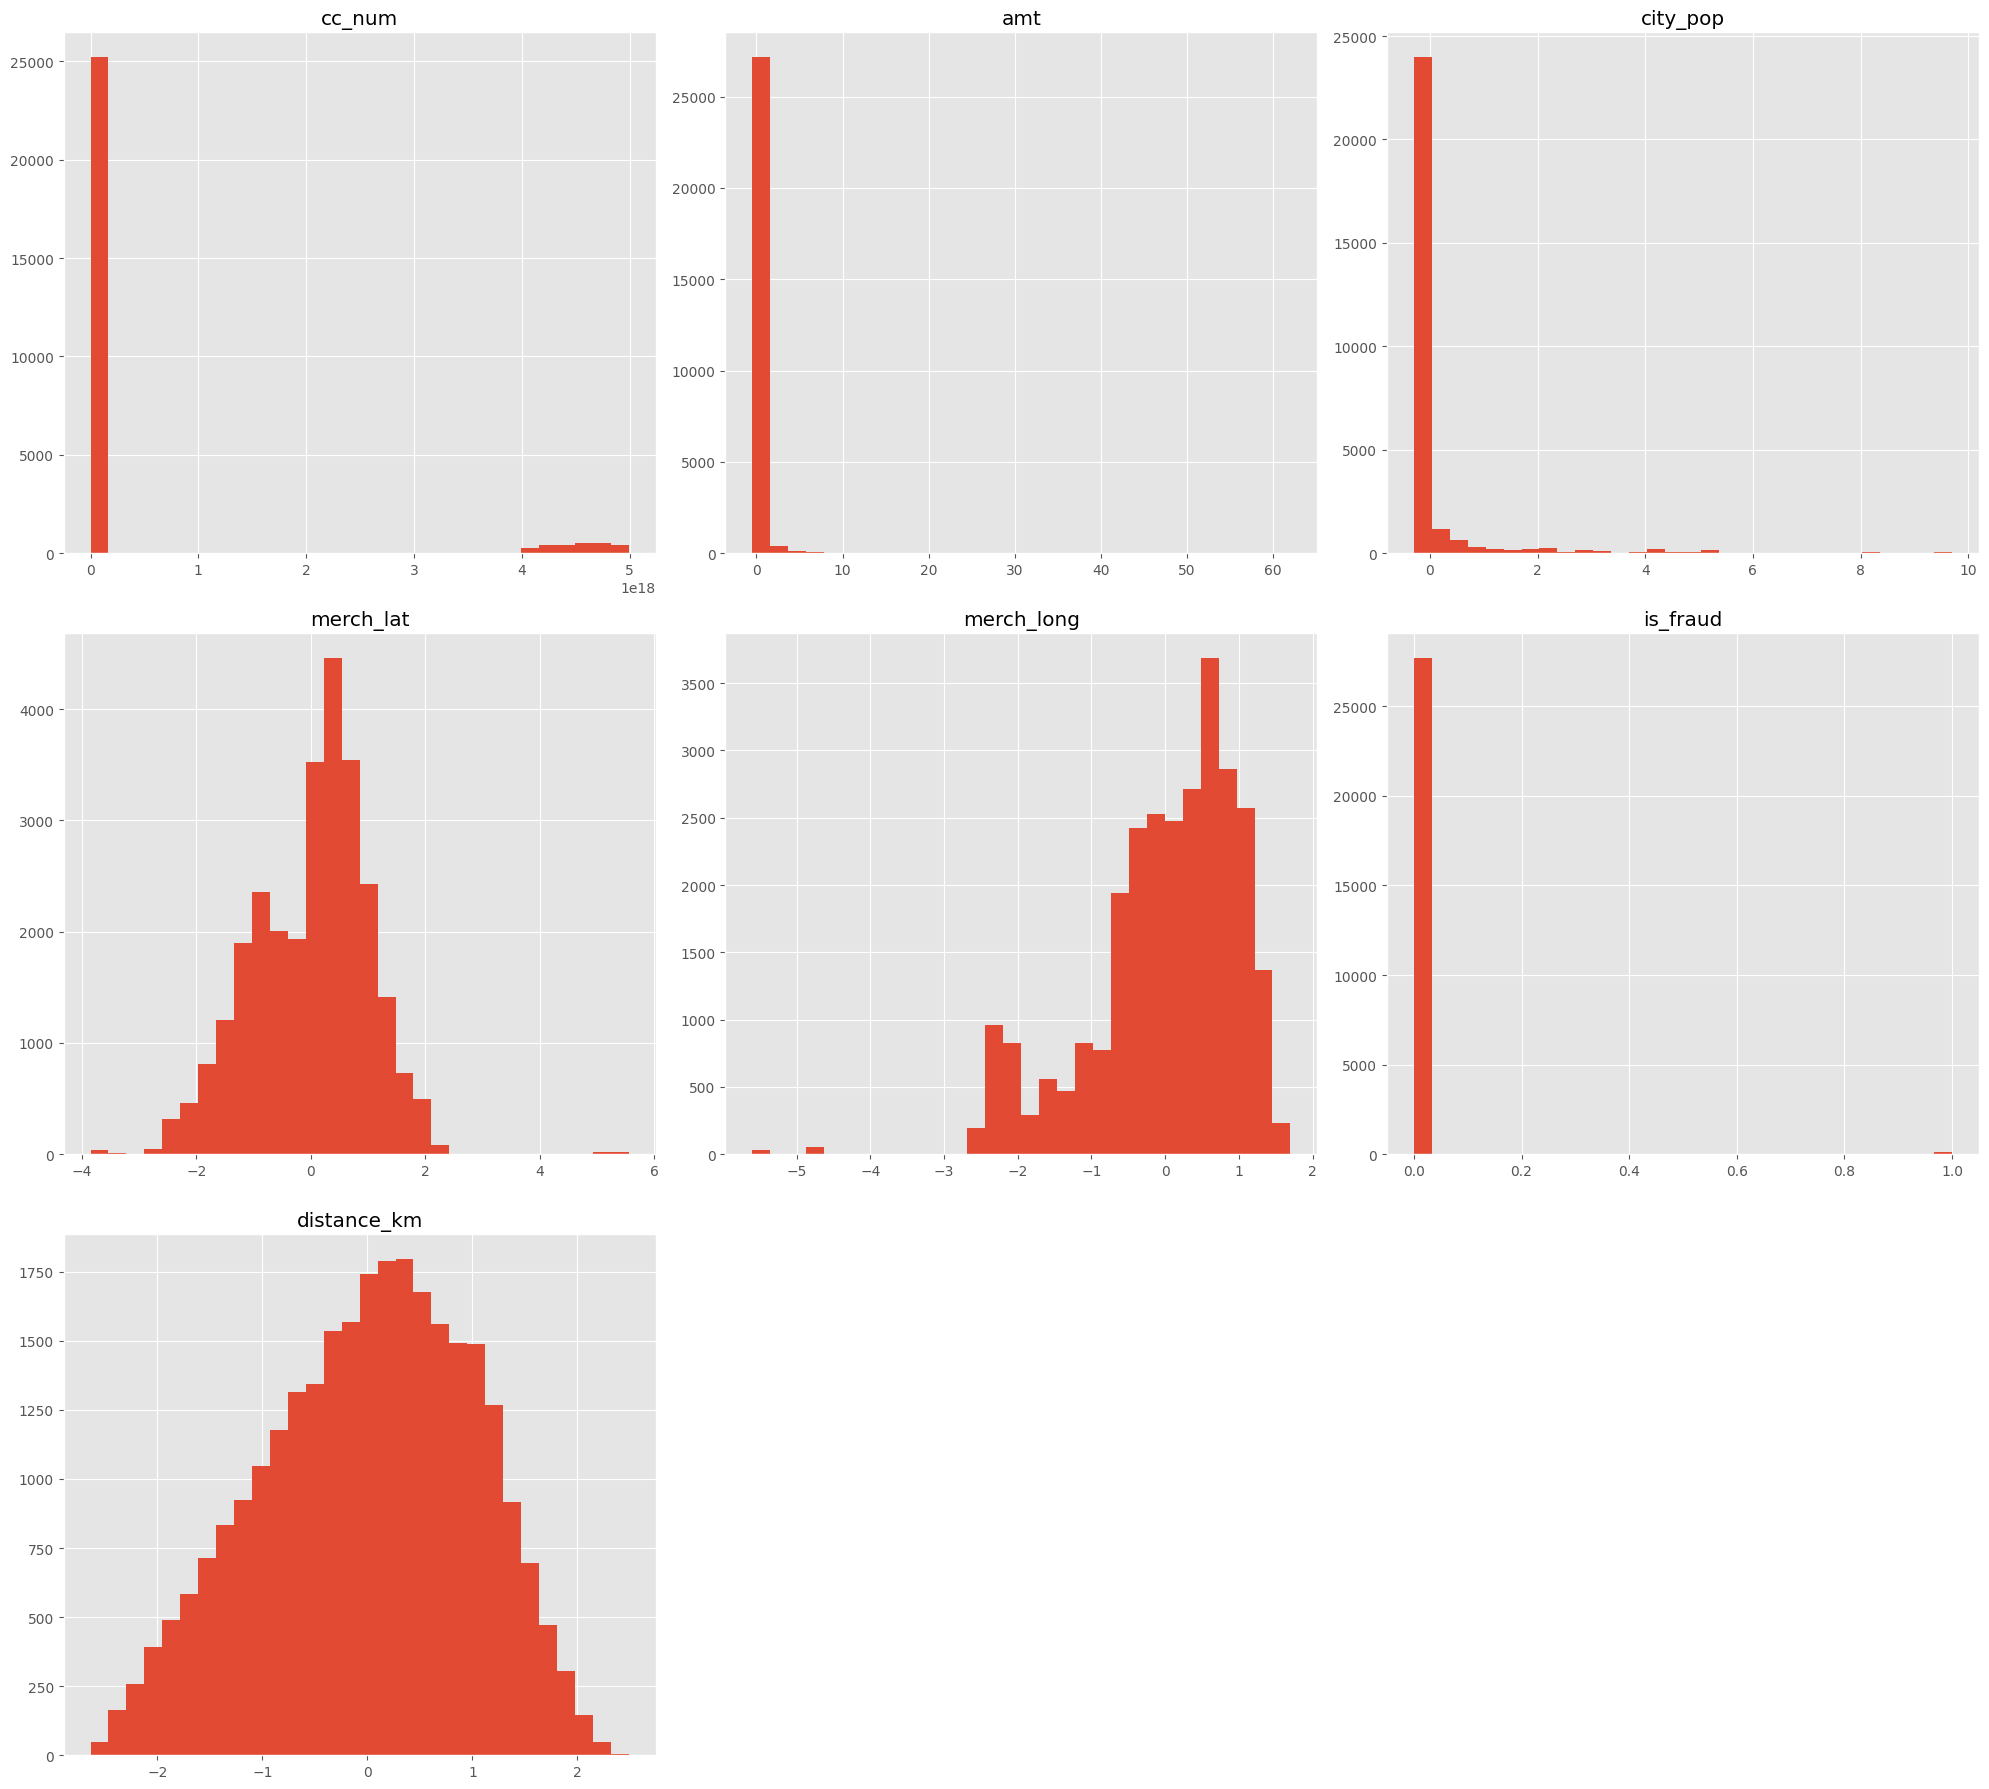

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the specified columns are present in df3_standardized
selected_columns = ['amt', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud', 'distance_km']

# Filter the DataFrame to include only the selected columns
df_selected = df3_standardized[selected_columns]

# Plot histograms for the selected numerical columns
df_selected.hist(bins=30, figsize=(20, 18))
plt.tight_layout()
plt.show()


In [53]:
import pandas as pd

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the dataframe with all columns visible
df3_standardized.head()


cc_num    amt  city_pop  merch_lat  merch_long  is_fraud  \
0      348789608637806 -0.131    -0.298      0.289      -0.649         0   
1     2291163933867244 -0.212     0.848     -0.984       0.673         0   
2      372509258176510 -0.441    -0.275      1.009       0.449         0   
3         571365235126 -0.314    -0.298      1.265       0.357         0   
4  4225990116481262579 -0.459    -0.282     -3.724      -4.821         0   

   distance_km  Generation_Numeric  day_of_week  hour_of_day  month  quarter  \
0       -0.561                   1            1            5     12        4   
1       -1.027                   2            0            2      6        2   
2        0.590                   3            0           15     12        4   
3        0.214                   3            3           23     12        4   
4       -0.131                   2            5           11      6        2   

   is_weekend  merchant_fraud_Abbott-Steuber  \
0           0                              0   
1           0                              0   
2           0                              0   
3           0                              0   
4           1                              0   

   merchant_fraud_Abernathy and Sons  merchant_fraud_Abshire PLC  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           0   

   merchant_fraud_Adams, Kovacek and Kuhlman  merchant_fraud_Adams-Barrows  \
0                                          0                             0   
1                                          0                             0   
2                                          0                             0   
3                                          0                             0   
4                                          0                             0   

   merchant_fraud_Altenwerth, Cartwright and Koss  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   merchant_fraud_Altenwerth-Kilback  merchant_fraud_Ankunding LLC  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   

   merchant_fraud_Ankunding-Carroll  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   merchant_fraud_Armstrong, Walter and Gottlieb  merchant_fraud_Auer LLC  \
0                                              0                        0   
1                                              0                        0   
2                                              0                        0   
3                                              0                        0   
4                                              0                        0   

   merchant_fraud_Auer-Mosciski  merchant_fraud_Auer-West  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   merchant_fraud_Bahringer Group  \
0                               0   
1                               

from matplotlib import pyplot as plt
_df_0['cc_num'].plot(kind='hist', bins=20, title='cc_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['amt'].plot(kind='hist', bins=20, title='amt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['city_pop'].plot(kind='hist', bins=20, title='city_pop')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['merch_lat'].plot(kind='hist', bins=20, title='merch_lat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='cc_num', y='amt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='amt', y='city_pop', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='city_pop', y='merch_lat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='merch_lat', y='merch_long', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['is_fraud']
  ys = series['cc_num']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('is_fraud', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_fraud')
_ = plt.ylabel('cc_num')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['is_fraud']
  ys = series['amt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('is_fraud', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_fraud')
_ = plt.ylabel('amt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['is_fraud']
  ys = series['city_pop']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('is_fraud', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_fraud')
_ = plt.ylabel('city_pop')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['is_fraud']
  ys = series['merch_lat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('is_fraud', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('is_fraud')
_ = plt.ylabel('merch_lat')

from matplotlib import pyplot as plt
_df_12['cc_num'].plot(kind='line', figsize=(8, 4), title='cc_num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['amt'].plot(kind='line', figsize=(8, 4), title='amt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['city_pop'].plot(kind='line', figsize=(8, 4), title='city_pop')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['merch_lat'].plot(kind='line', figsize=(8, 4), title='merch_lat')
plt.gca().spines[['top', 'right']].set_visible(False)